In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
file_path = 'Anime-dataset-2023.csv'
data = pd.read_csv(file_path)
df = pd.DataFrame(data)
df.head(5)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [3]:
def rename_columns(cols):
    
    cols = cols.str.replace(' ', '_')
    cols = cols.str.replace('-', '_')
    cols = cols.str.title()
    return cols
    
df.columns = rename_columns(df.columns)

df.columns

Index(['Anime_Id', 'Name', 'English_Name', 'Other_Name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status',
       'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
       'Rank', 'Popularity', 'Favorites', 'Scored_By', 'Members', 'Image_Url'],
      dtype='object')

In [4]:
df.head(1)

,Anime_Id,Name,English_Name,Other_Name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored_By,Members,Image_Url
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Anime_Id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English_Name  24905 non-null  object
 3   Other_Name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [6]:
df.describe()

,Anime_Id,Popularity,Favorites,Members
count,24905.000000,24905.000000,24905.000000,2.490500e+04
mean,29776.709014,12265.388356,432.595222,3.710496e+04
std,17976.076290,7187.428393,4353.181647,1.568252e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,10507.000000,6040.000000,0.000000,2.090000e+02
50%,34628.000000,12265.000000,1.000000,1.056000e+03
75%,45240.000000,18491.000000,18.000000,9.326000e+03
max,55735.000000,24723.000000,217606.000000,3.744541e+06


In [7]:
df.shape 

(24905, 24)

In [8]:
df.isnull().sum()

Anime_Id        0
Name            0
English_Name    0
Other_Name      0
Score           0
Genres          0
Synopsis        0
Type            0
Episodes        0
Aired           0
Premiered       0
Status          0
Producers       0
Licensors       0
Studios         0
Source          0
Duration        0
Rating          0
Rank            0
Popularity      0
Favorites       0
Scored_By       0
Members         0
Image_Url       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:

all_genres = ','.join(df['Genres'])

individual_genres = all_genres.split(',')

individual_genres = [genre.strip() for genre in individual_genres]

unique_genres_set = set(individual_genres)

sorted_unique_genres = sorted(unique_genres_set)

count = len(sorted_unique_genres)

print("Total Genres:", count)
print("List of Genres:")
sorted_unique_genres

Total Genres: 22
List of Genres:


['Action',
 'Adventure',
 'Avant Garde',
 'Award Winning',
 'Boys Love',
 'Comedy',
 'Drama',
 'Ecchi',
 'Erotica',
 'Fantasy',
 'Girls Love',
 'Gourmet',
 'Hentai',
 'Horror',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Slice of Life',
 'Sports',
 'Supernatural',
 'Suspense',
 'UNKNOWN']

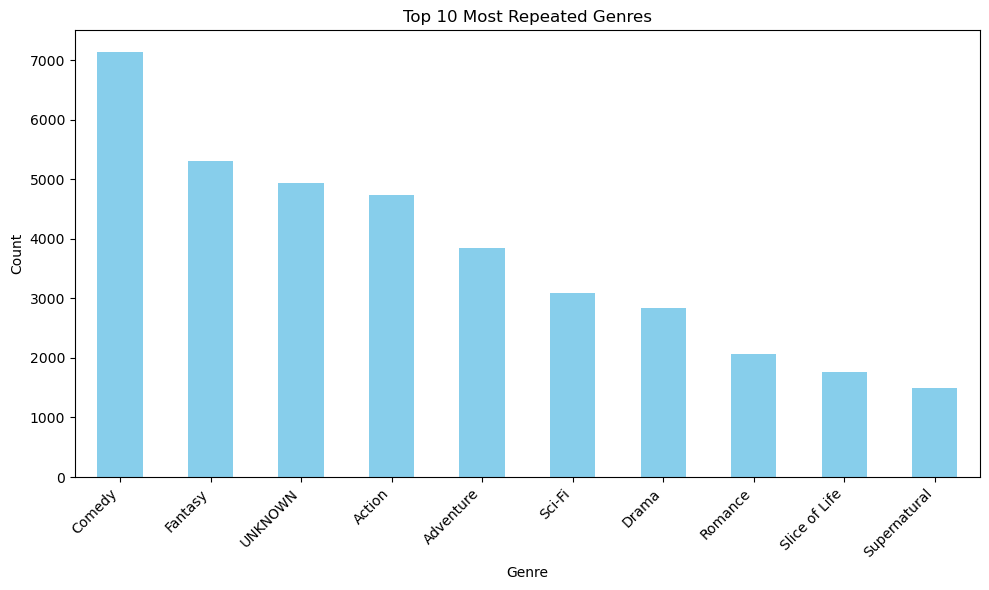

In [11]:
import matplotlib.pyplot as plt
genre_counts = df['Genres'].str.split(',').explode().str.strip().value_counts()

plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Repeated Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

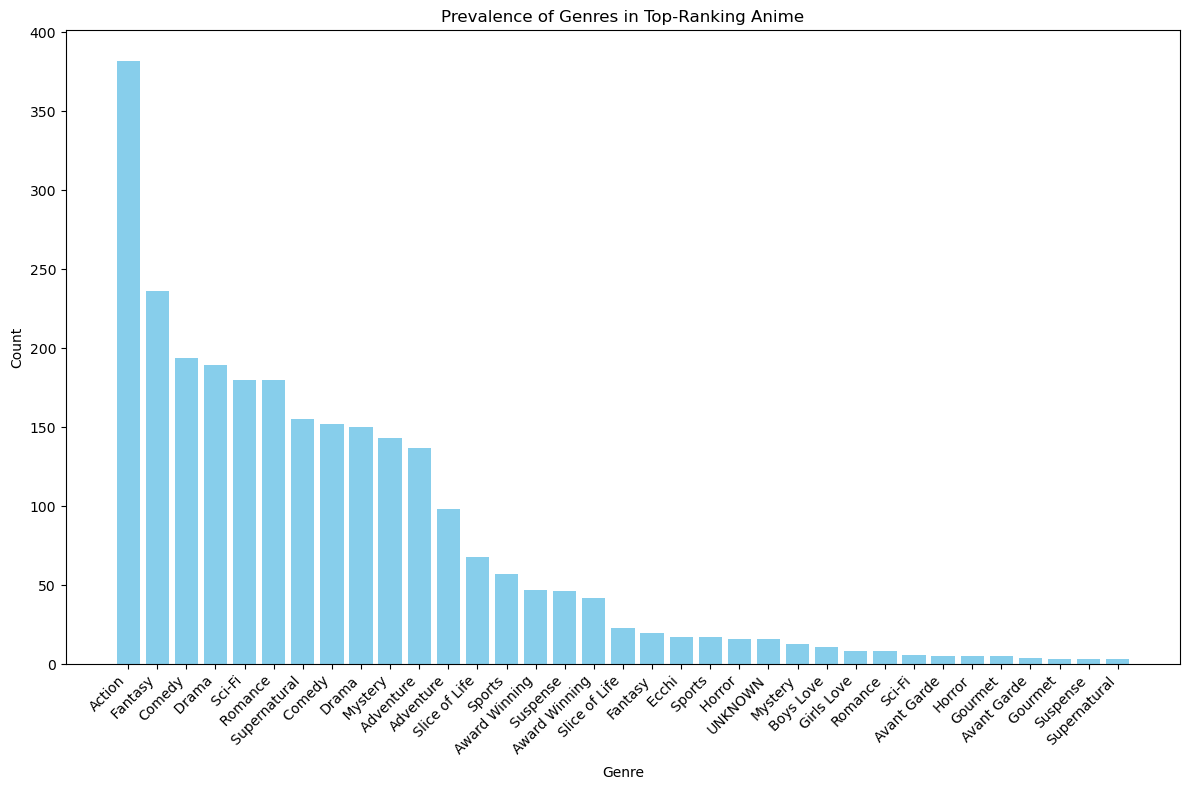

In [48]:

genre_counts = {}
for index, row in high_ranked_anime.iterrows():
    genres = row['Genres']
    for genre in genres:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1
sorted_genre_counts = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

genres, counts = zip(*sorted_genre_counts)

plt.figure(figsize=(12, 8))
plt.bar(genres, counts, color='skyblue')
plt.title('Prevalence of Genres in Top-Ranking Anime')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


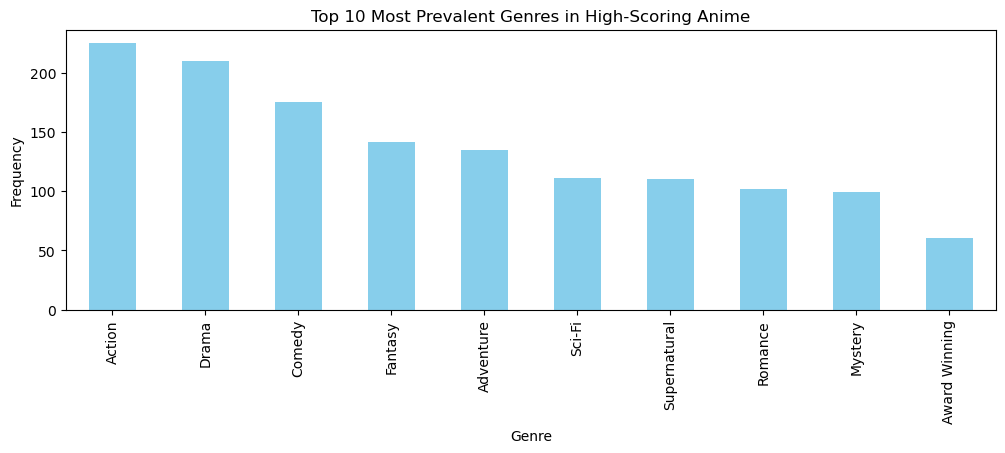

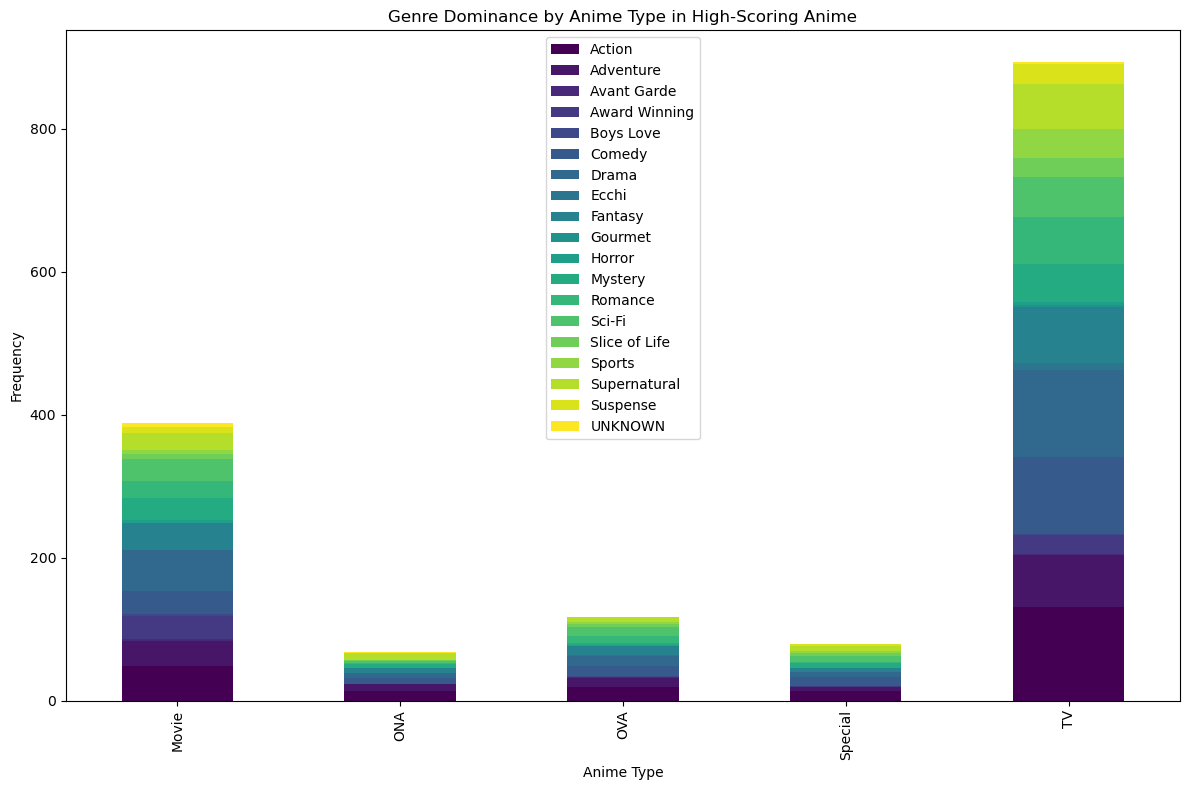

In [14]:
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
high_scoring_threshold = 8.0  
high_scoring_anime = df[df['Score'] >= high_scoring_threshold]


genre_counts = high_scoring_anime['Genres'].str.split(', ').explode().value_counts()

genre_by_type_counts = high_scoring_anime.groupby(['Type'])['Genres'].apply(lambda x: pd.Series(x.str.split(', ').explode().value_counts())).unstack(fill_value=0)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
genre_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Prevalent Genres in High-Scoring Anime')
plt.xlabel('Genre')
plt.ylabel('Frequency')

plt.subplot(2, 1, 1)
genre_by_type_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Genre Dominance by Anime Type in High-Scoring Anime')
plt.xlabel('Anime Type')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\Rohan\AppData\Local\Temp\ipykernel_14020\948811610.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df['Aired'], errors='coerce').dt.year


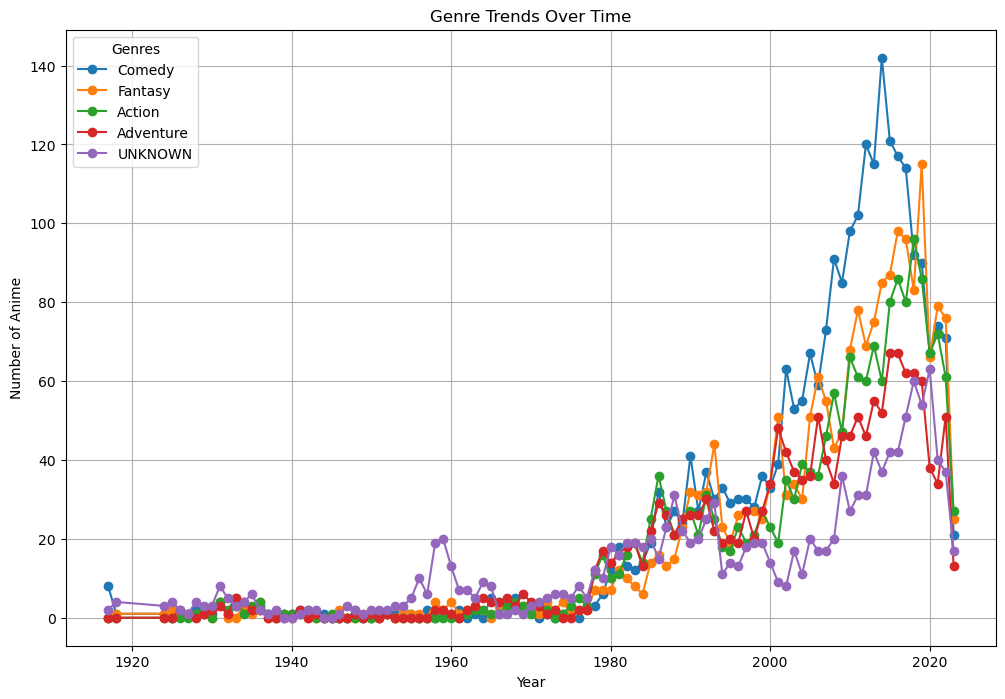

In [13]:
df['Year'] = pd.to_datetime(df['Aired'], errors='coerce').dt.year

df_exploded = df.assign(Genres=df['Genres'].str.split(',')).explode('Genres')

df_exploded['Genres'] = df_exploded['Genres'].str.strip()

genre_trends = df_exploded.groupby(['Year', 'Genres']).size().unstack().fillna(0)

top_genres = genre_trends.sum().sort_values(ascending=False).head(5).index

genre_trends[top_genres].plot(figsize=(12, 8), marker='o')

plt.title('Genre Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Anime')
plt.legend(title='Genres')
plt.grid(True)
plt.show()

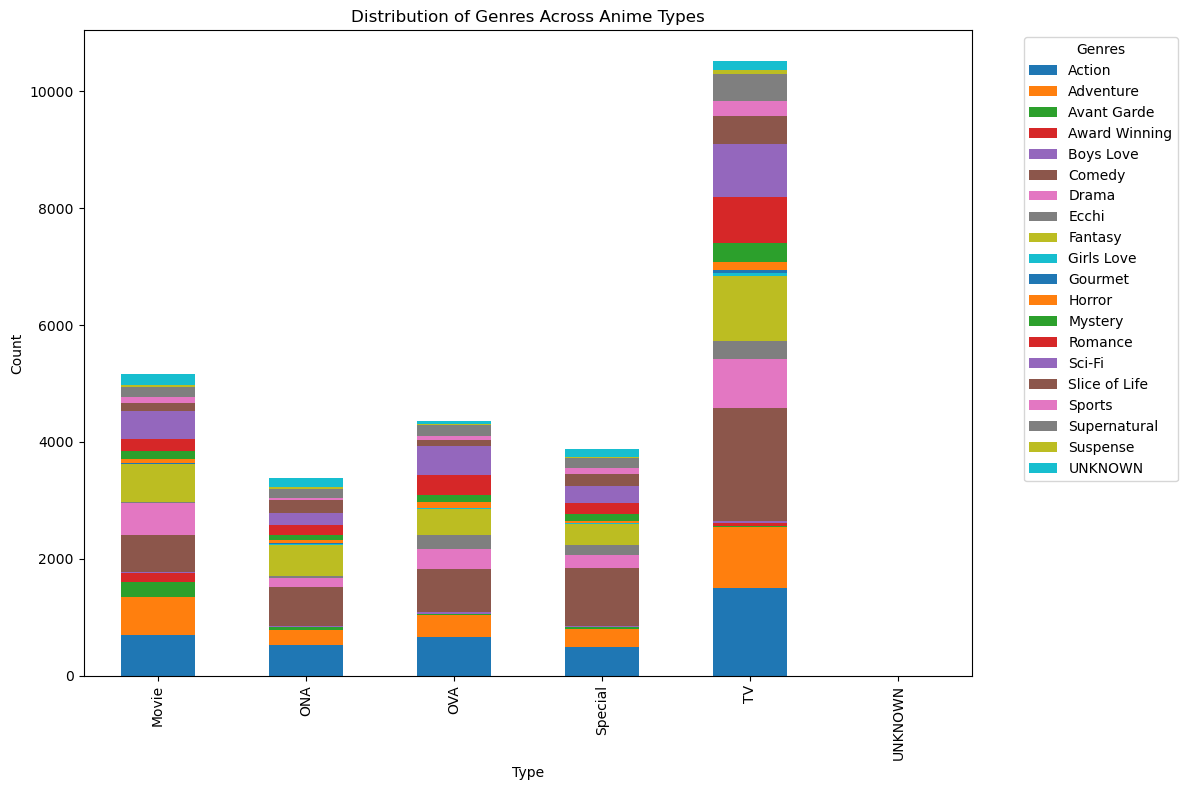

In [16]:
df_exploded = df.assign(Genres=df['Genres'].str.split(', ')).explode('Genres')

genre_type_counts = df_exploded.groupby(['Type', 'Genres']).size().unstack().fillna(0)

genre_type_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Genres Across Anime Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

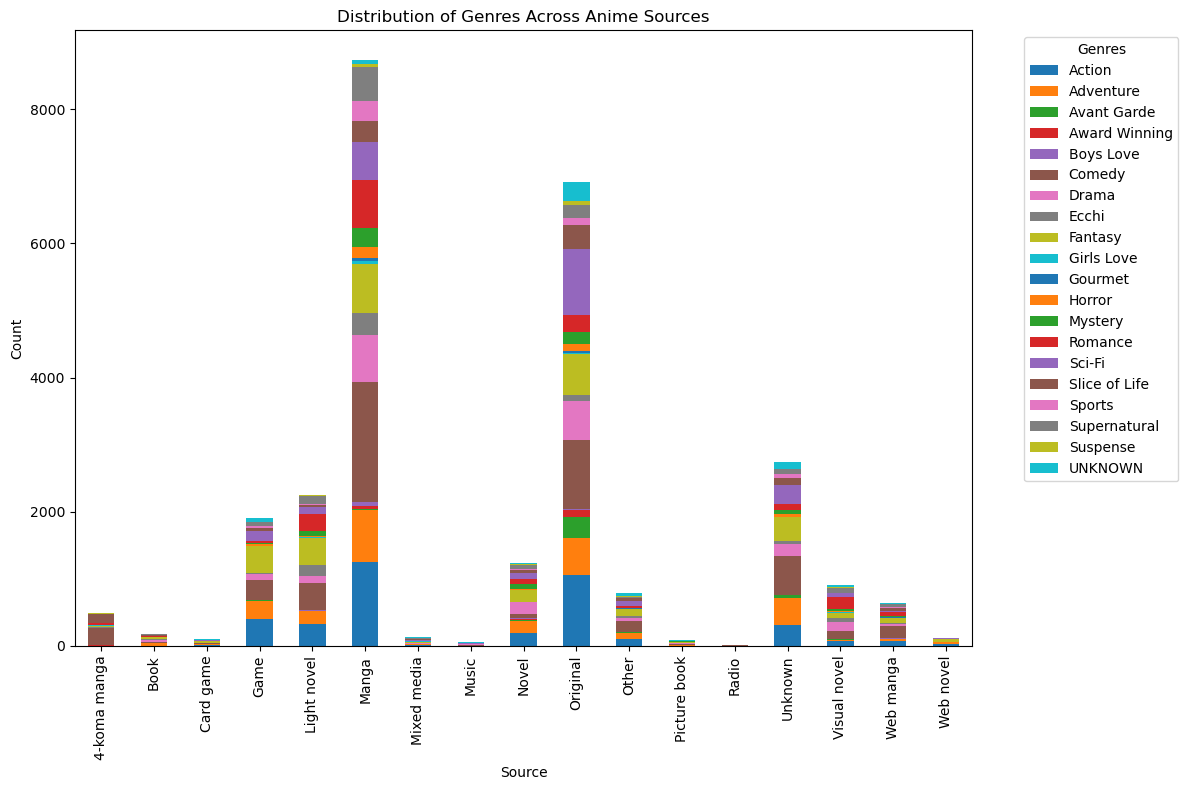

In [17]:
df_exploded = df.assign(Genres=df['Genres'].str.split(', ')).explode('Genres')

genre_source_counts = df_exploded.groupby(['Source', 'Genres']).size().unstack().fillna(0)

genre_source_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Genres Across Anime Sources')
plt.xlabel('Source')
plt.ylabel('Count')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

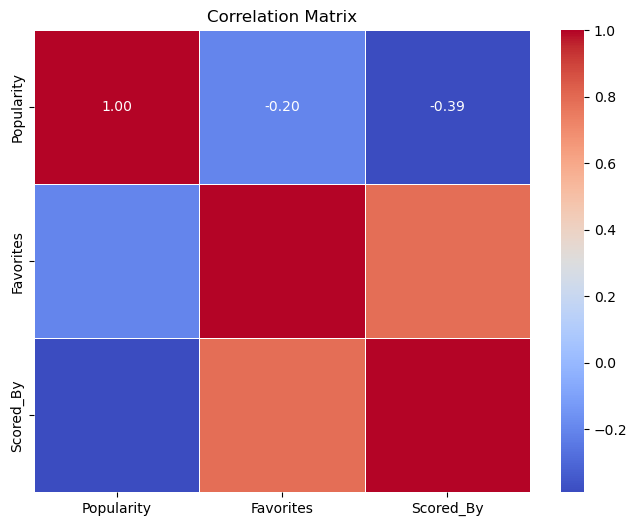

In [18]:
columns = ['Popularity', 'Favorites', 'Scored_By']

correlation_matrix = df[columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

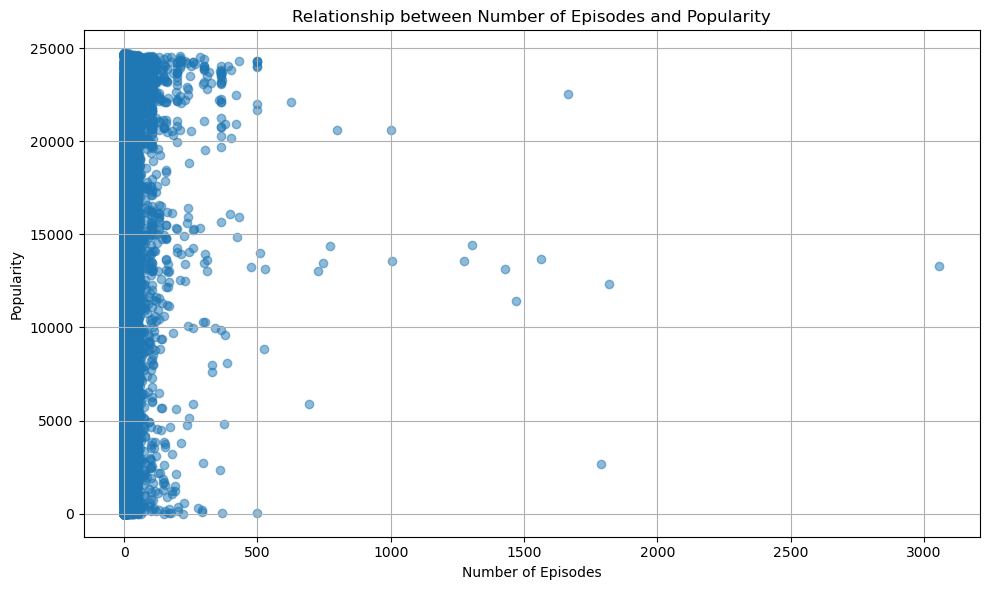

In [19]:
df = pd.read_csv('Anime-dataset-2023.csv')


df['Episodes'] = pd.to_numeric(df['Episodes'], errors='coerce')


df_cleaned = df.dropna(subset=['Episodes', 'Popularity'])


plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Episodes'], df_cleaned['Popularity'], alpha=0.5)
plt.title('Relationship between Number of Episodes and Popularity')
plt.xlabel('Number of Episodes')
plt.ylabel('Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()

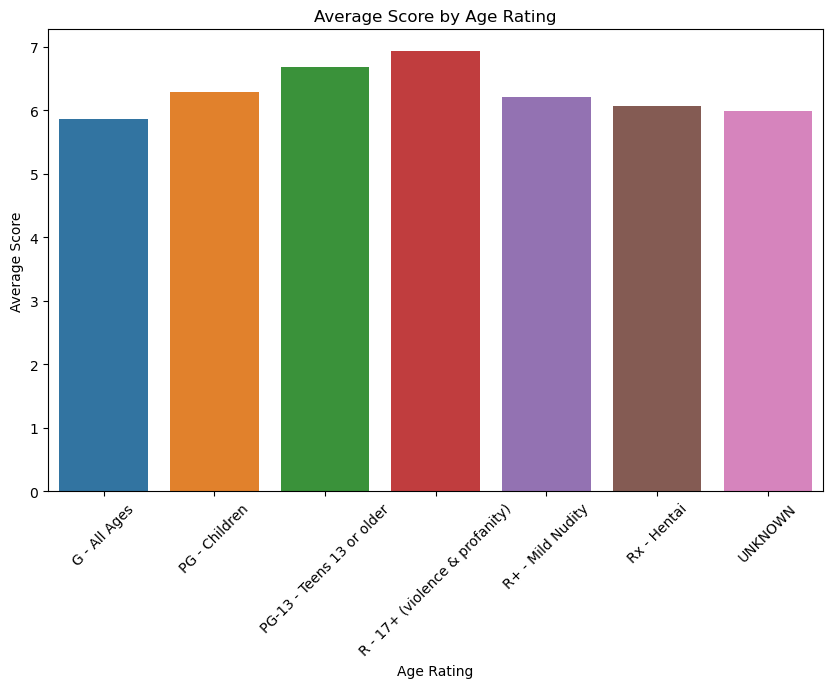

In [20]:
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

# Drop rows with missing values in specified columns
df_cleaned = df.dropna(subset=['Rating', 'Score'])

# Calculate the average score for each age rating
average_score_by_rating = df_cleaned.groupby('Rating')['Score'].mean().reset_index()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Score', data=average_score_by_rating)
plt.title('Average Score by Age Rating')
plt.xlabel('Age Rating')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

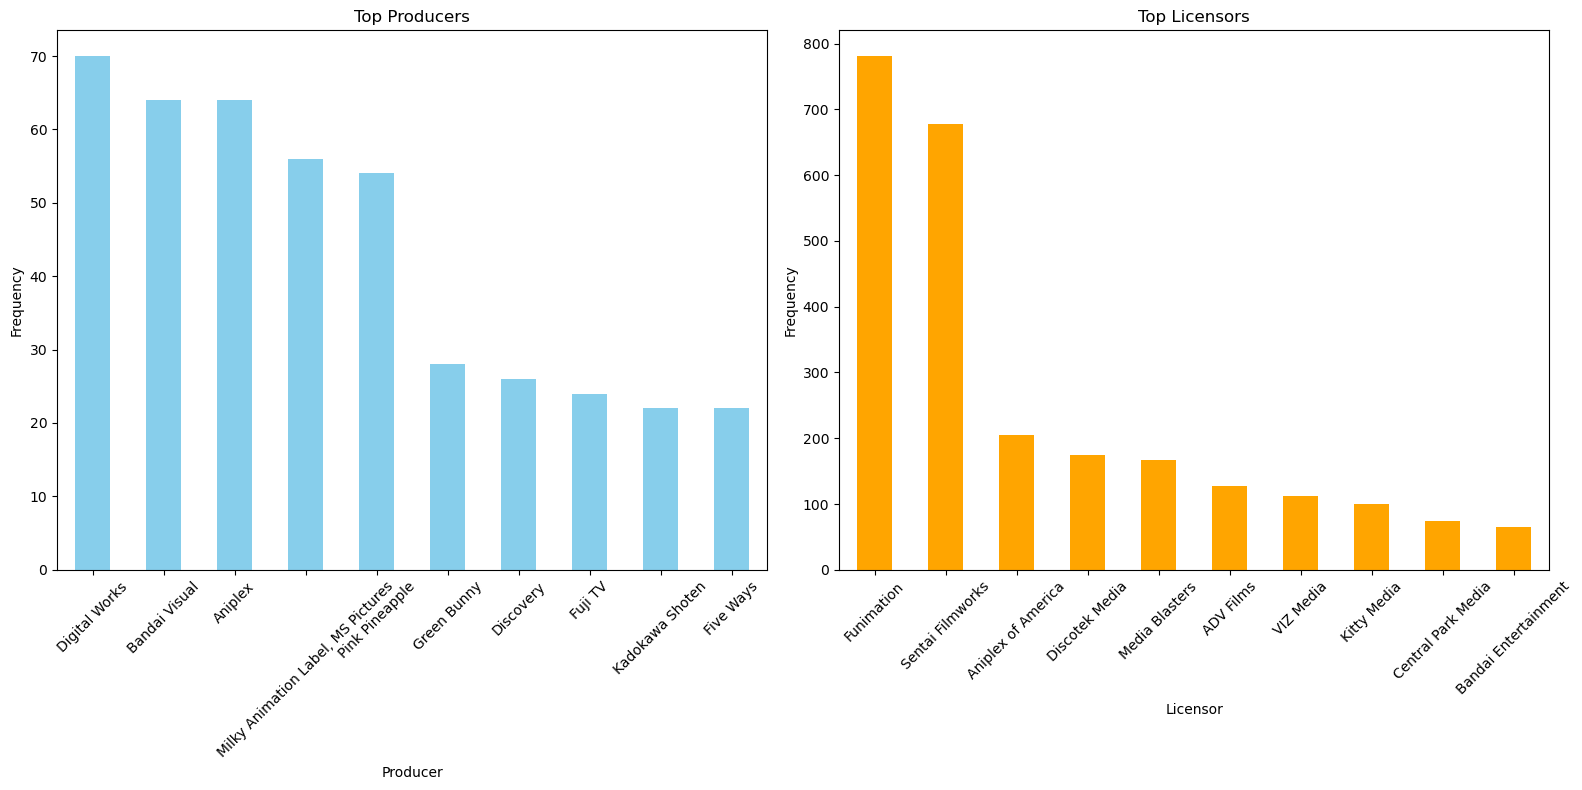

In [21]:
producers_licensors = df[['Producers', 'Licensors']]

# Drop rows with missing values in 'Producers' and 'Licensors' columns
producers_licensors_cleaned = producers_licensors.dropna()

# Remove 'Unknown' values from both 'Producers' and 'Licensors'
producers_licensors_cleaned = producers_licensors_cleaned[
    (~producers_licensors_cleaned['Producers'].str.contains('Unknown', case=False)) & 
    (~producers_licensors_cleaned['Licensors'].str.contains('Unknown', case=False))
]

# Count the frequency of top producers and licensors
top_producers = producers_licensors_cleaned['Producers'].value_counts().head(10)
top_licensors = producers_licensors_cleaned['Licensors'].value_counts().head(10)

# Plot the bar plots
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
top_producers.plot(kind='bar', color='skyblue')  # Adjust width for spacing
plt.title('Top Producers')
plt.xlabel('Producer')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
top_licensors.plot(kind='bar', color='orange')  # Adjust width for spacing
plt.title('Top Licensors')
plt.xlabel('Licensor')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

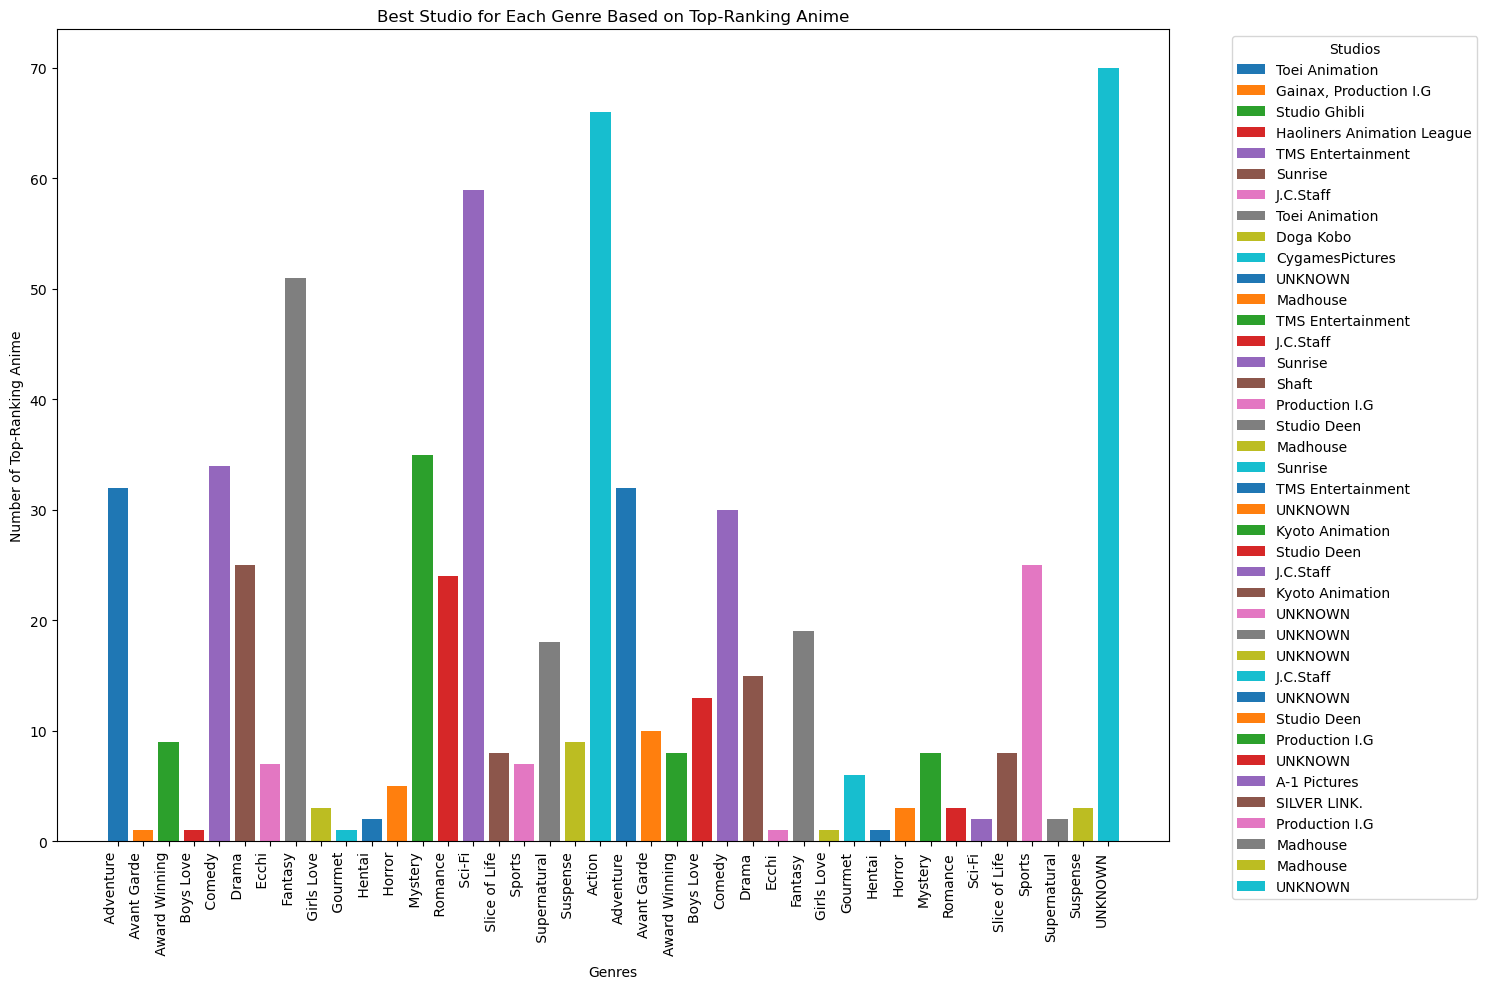

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Anime-dataset-2023.csv')

df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')

df.dropna(subset=['Rank'], inplace=True)

df['Genres'] = df['Genres'].str.split(',')

df = df[~df['Genres'].apply(lambda x: 'unknown' in x)]
df = df[df['Studios'] != 'unknown']

threshold_rank = df['Rank'].quantile(0.1)

top_ranked_anime = df[df['Rank'] <= threshold_rank]

exploded_df = top_ranked_anime.explode('Genres')

genre_studio_counts = exploded_df.groupby(['Genres', 'Studios']).size().reset_index(name='Count')

best_studio_per_genre = genre_studio_counts.loc[genre_studio_counts.groupby('Genres')['Count'].idxmax()]

plt.figure(figsize=(15, 10))
for genre in best_studio_per_genre['Genres'].unique():
    data = best_studio_per_genre[best_studio_per_genre['Genres'] == genre]
    plt.bar(data['Genres'], data['Count'], label=data['Studios'].values[0])

plt.title('Best Studio for Each Genre Based on Top-Ranking Anime')
plt.xlabel('Genres')
plt.ylabel('Number of Top-Ranking Anime')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Studios', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


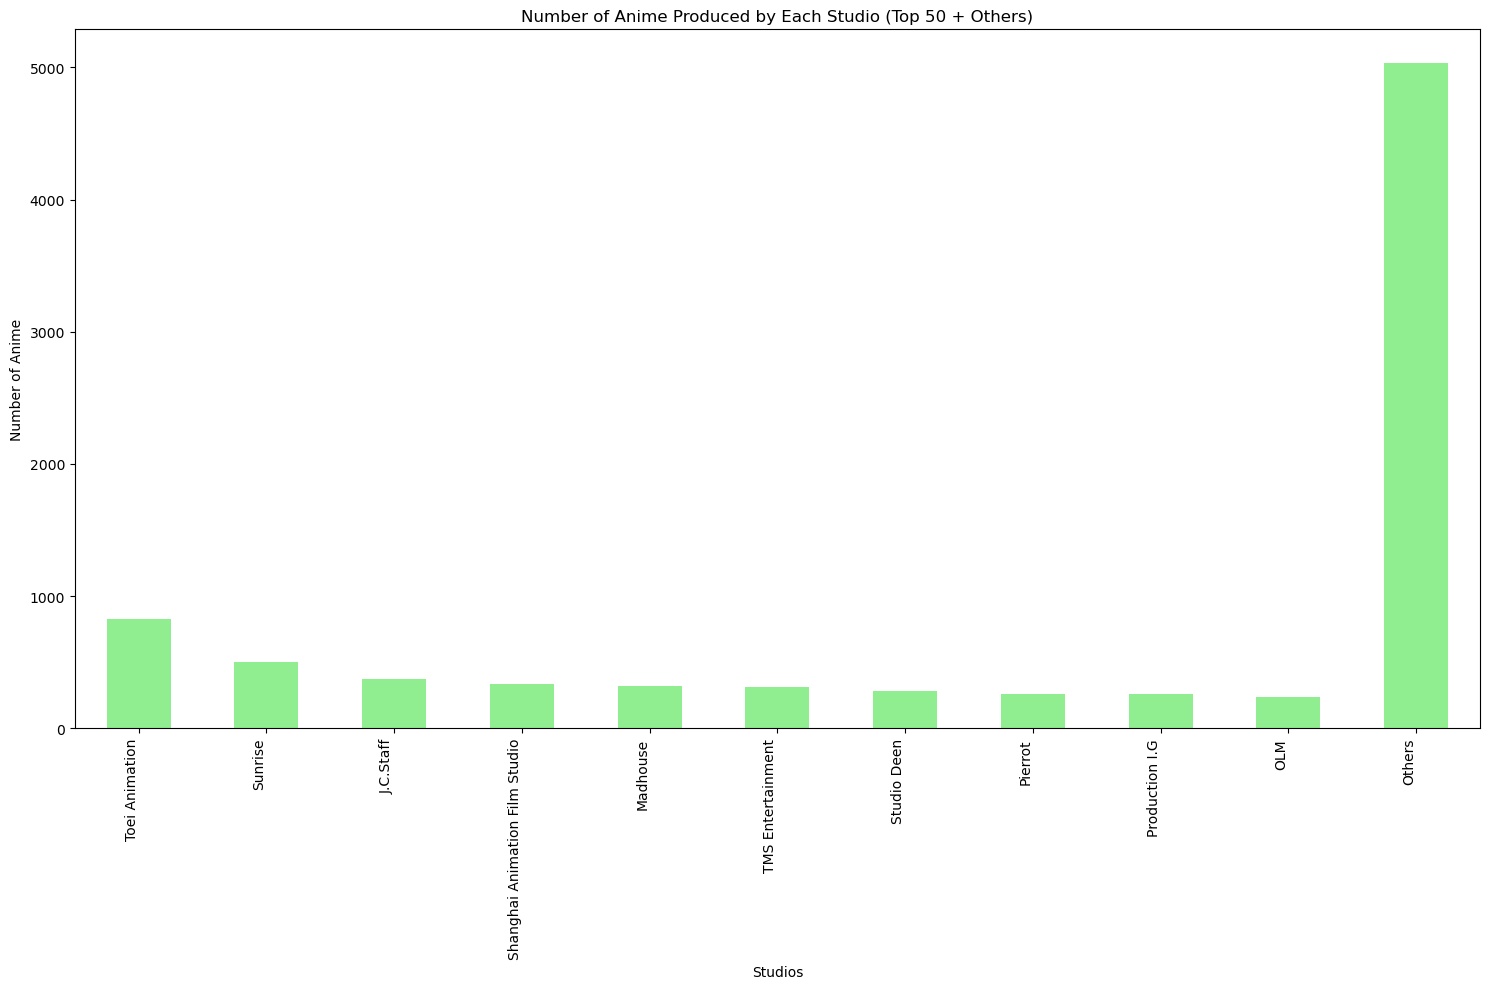

In [38]:
studio_anime_counts = df['Studios'].value_counts()

top_studios = studio_anime_counts.head(10)
others_count = studio_anime_counts[50:].sum()
top_studios['Others'] = others_count

# Create a bar plot to visualize the number of anime produced by each studio
plt.figure(figsize=(15, 10))
top_studios.plot(kind='bar', color='lightgreen')
plt.title('Number of Anime Produced by Each Studio (Top 50 + Others)')
plt.xlabel('Studios')
plt.ylabel('Number of Anime')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

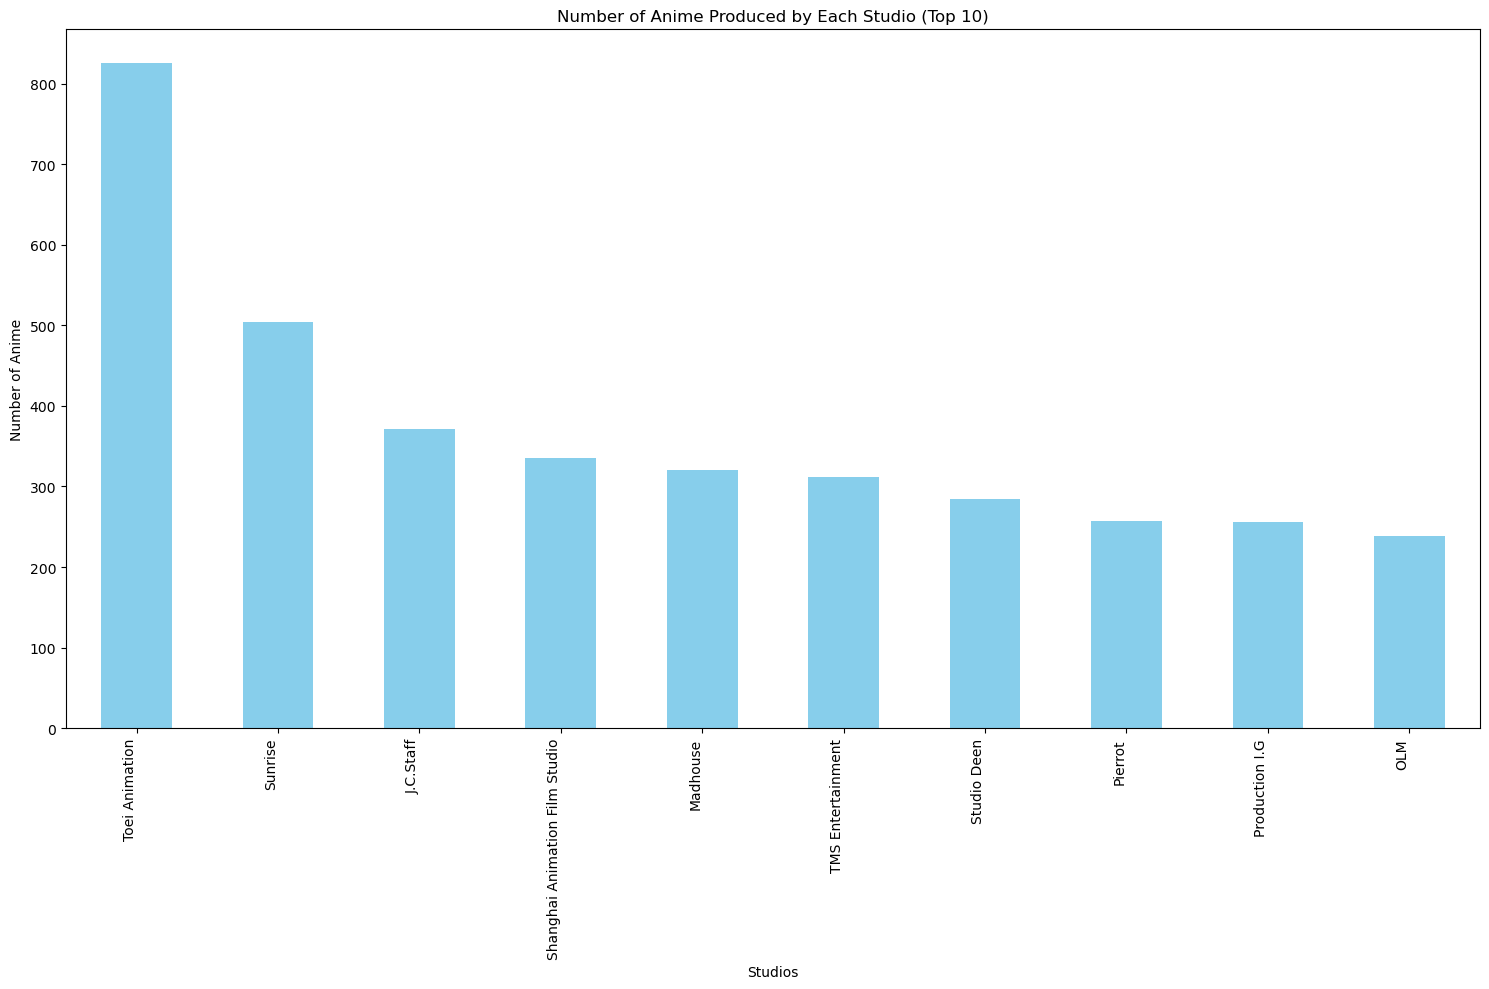

In [36]:
df = df[~df['Studios'].str.contains('UNKNOWN', case=False)]

# Count the number of anime produced by each studio
studio_anime_counts = df['Studios'].value_counts()

# Select the top 10 studios with the highest counts of anime produced
top_studios = studio_anime_counts.head(10)

# Create a bar plot to visualize the number of anime produced by each studio
plt.figure(figsize=(15, 10))
top_studios.plot(kind='bar', color='skyblue')
plt.title('Number of Anime Produced by Each Studio (Top 10)')
plt.xlabel('Studios')
plt.ylabel('Number of Anime')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

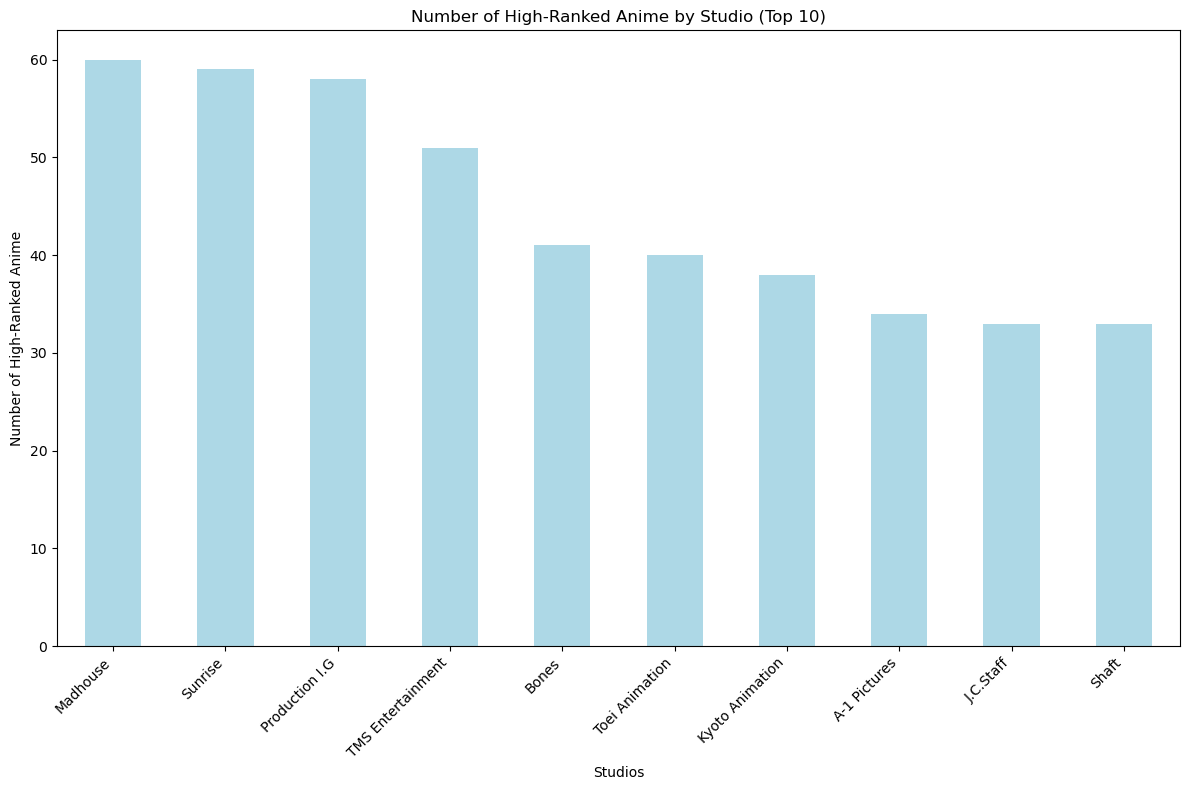

In [45]:
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')

# Drop rows with missing 'Rank' values
df.dropna(subset=['Rank'], inplace=True)

# Remove rows with 'unknown' values in the 'Studios' column
df = df[df['Studios'] != 'UNKNOWN']

# Define the threshold for high-ranked anime (e.g., top 10%)
threshold_rank = df['Rank'].quantile(0.1)

# Filter anime with a rank below the threshold
high_ranked_anime = df[df['Rank'] < threshold_rank]

# Group the dataset by studios and count the number of high-ranked anime produced by each studio
studio_high_ranked_counts = high_ranked_anime['Studios'].value_counts()

# Select the top 10 studios with the highest counts of high-ranked anime
top_10_studios = studio_high_ranked_counts.head(10)

# Create a bar plot to visualize the number of high-ranked anime produced by each studio
plt.figure(figsize=(12, 8))
top_10_studios.plot(kind='bar', color='lightblue')
plt.title('Number of High-Ranked Anime by Studio (Top 10)')
plt.xlabel('Studios')
plt.ylabel('Number of High-Ranked Anime')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

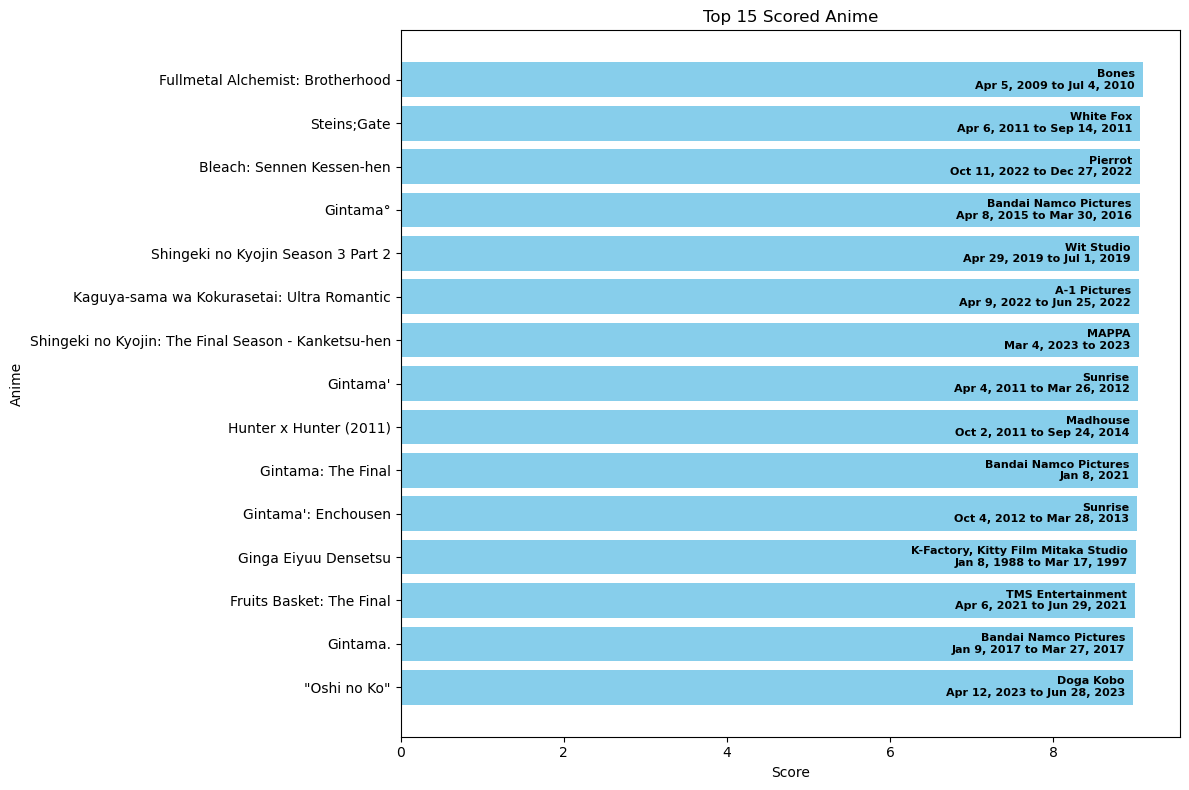

In [43]:
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

df.dropna(subset=['Score'], inplace=True)

top_10_scored_anime = df.nlargest(15, 'Score')[['Name', 'Studios', 'Aired', 'Score']]

plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_scored_anime['Name'], top_10_scored_anime['Score'], color='skyblue')
plt.xlabel('Score')
plt.ylabel('Anime')
plt.title('Top 15 Scored Anime')

# Annotate the bars with the studio and release date
for bar, (name, studio, aired) in zip(bars, top_10_scored_anime[['Name', 'Studios', 'Aired']].values):
    plt.text(bar.get_width() - 0.1, bar.get_y() + bar.get_height()/2, f'{studio}\n{aired}', 
             va='center', ha='right', fontsize=8, color='black', fontweight='bold')

plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

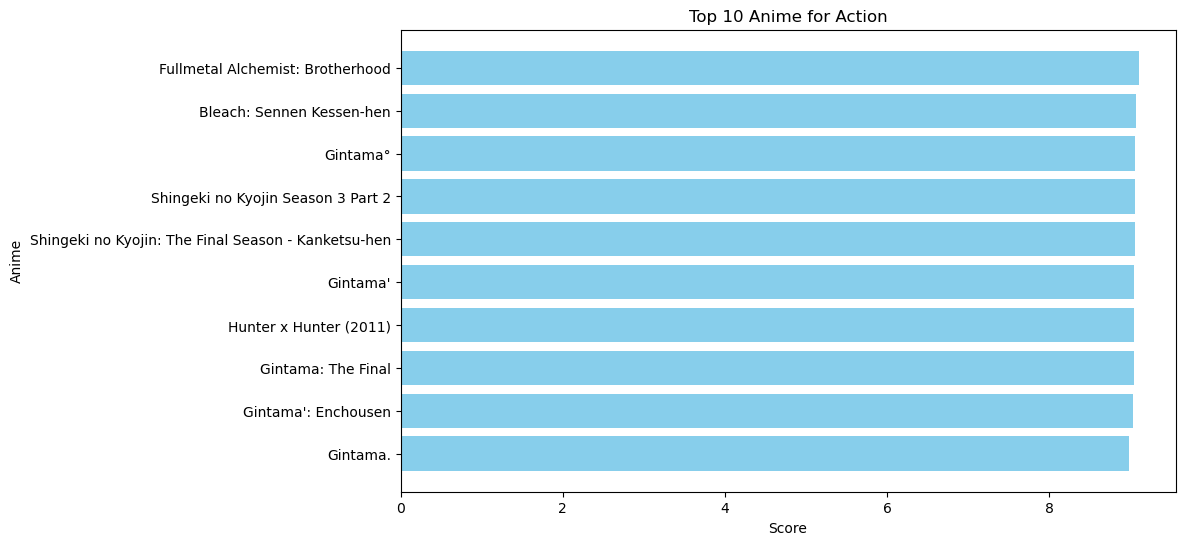

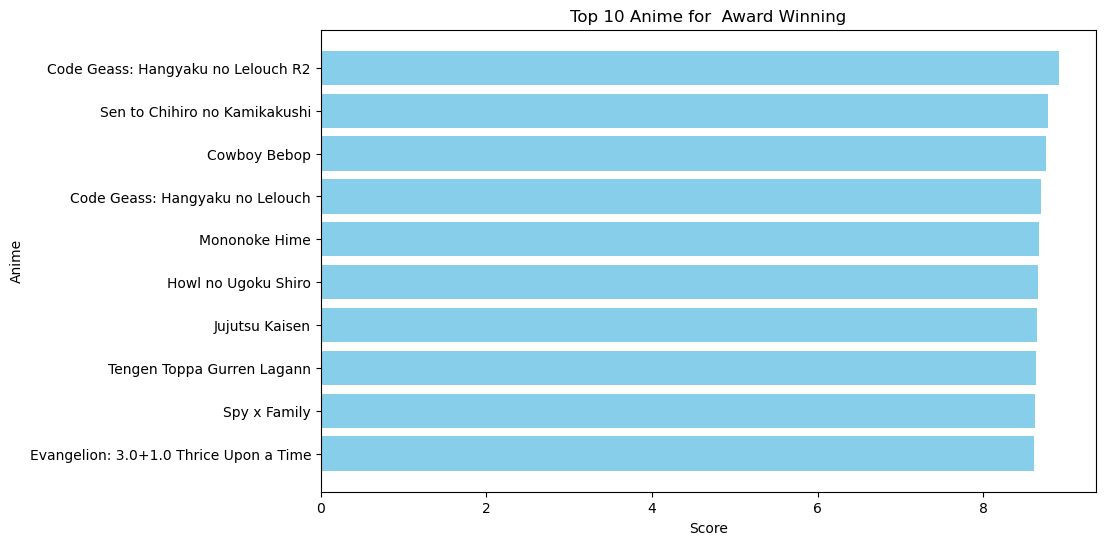

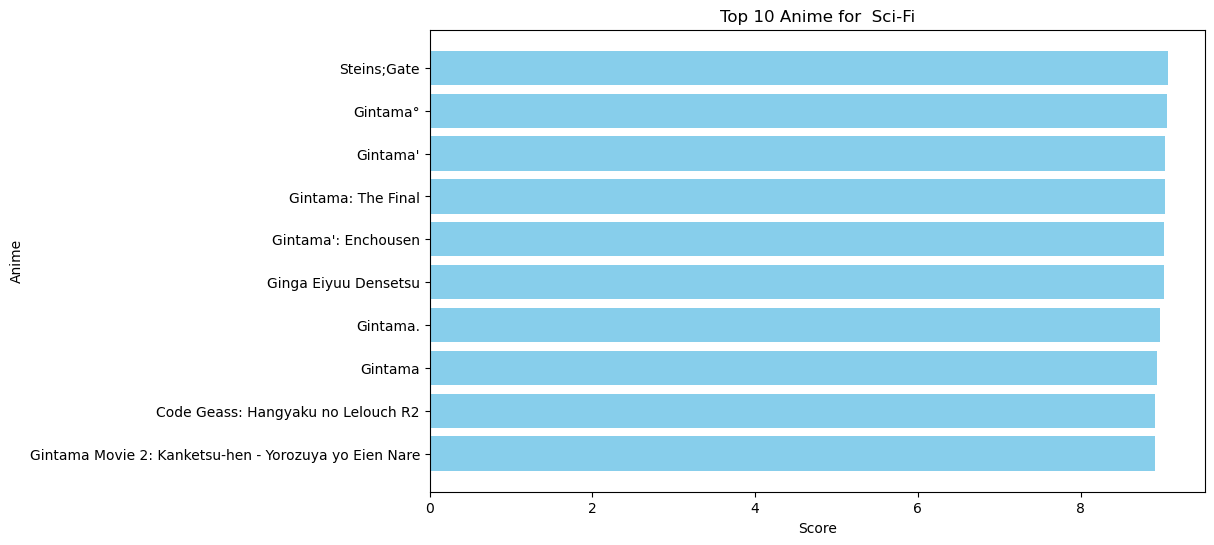

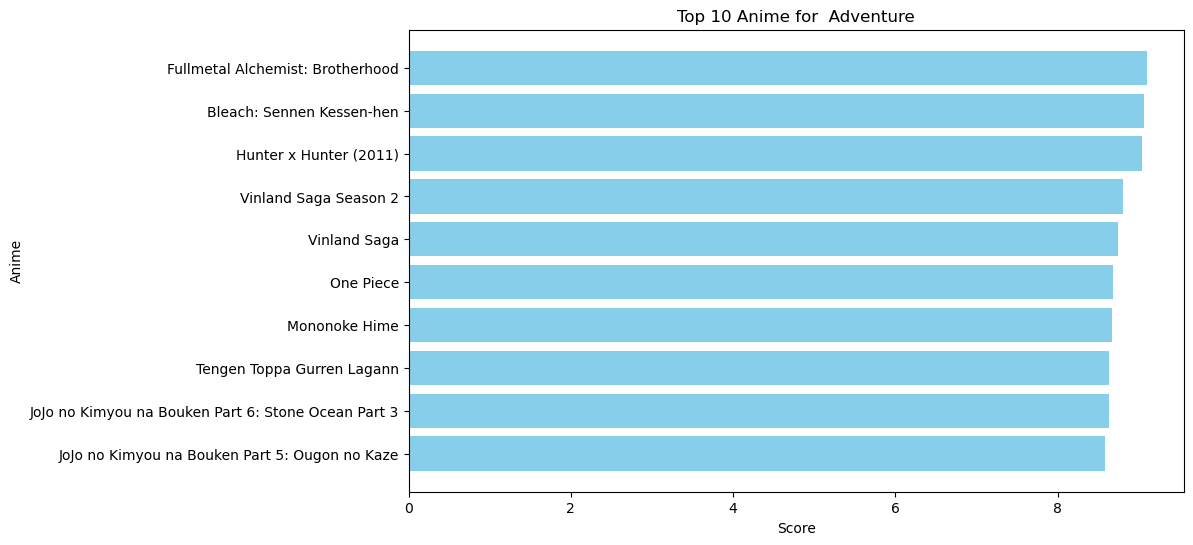

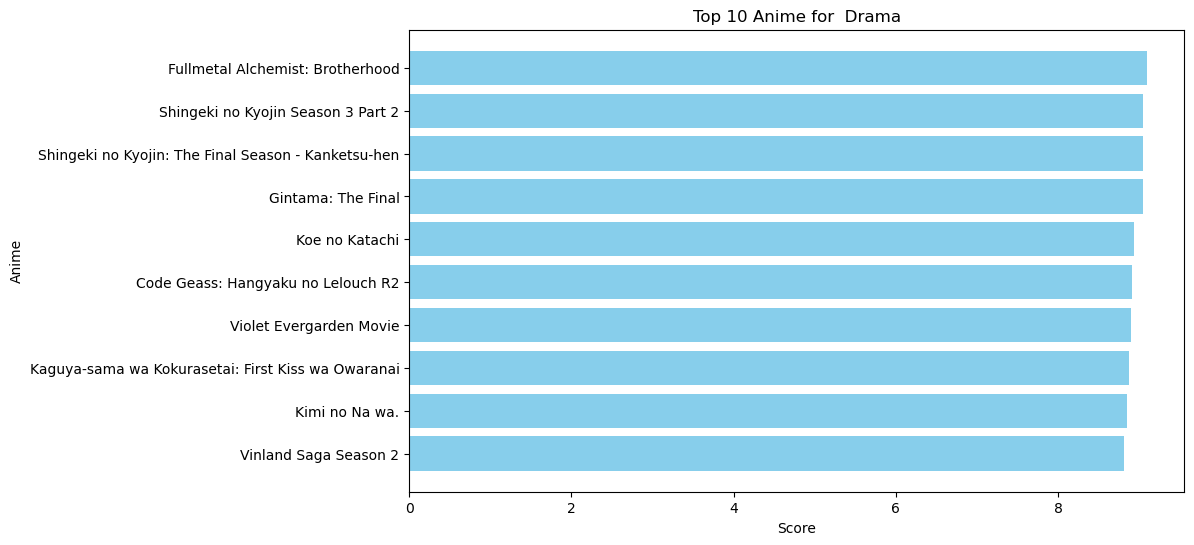

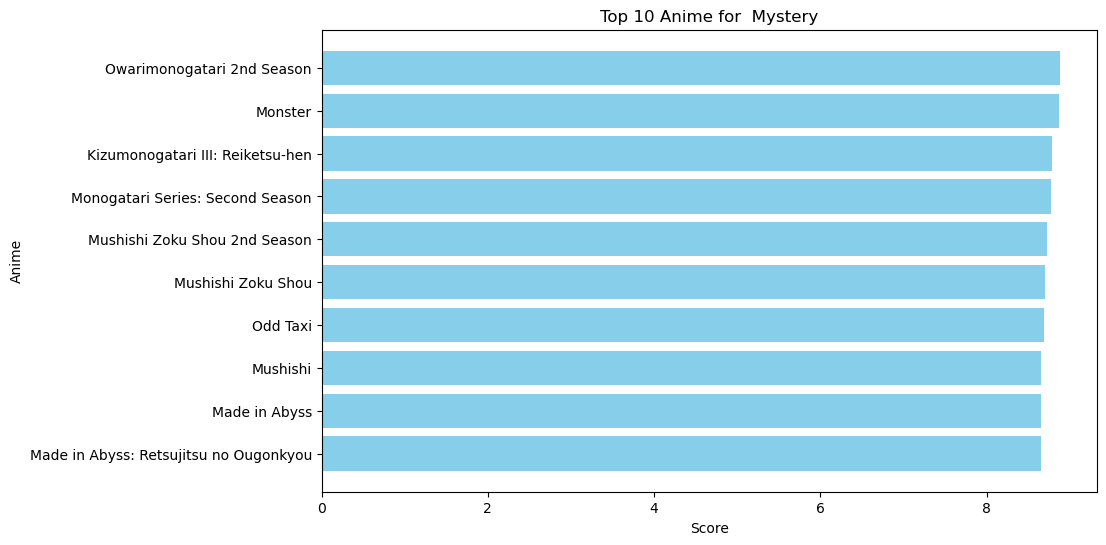

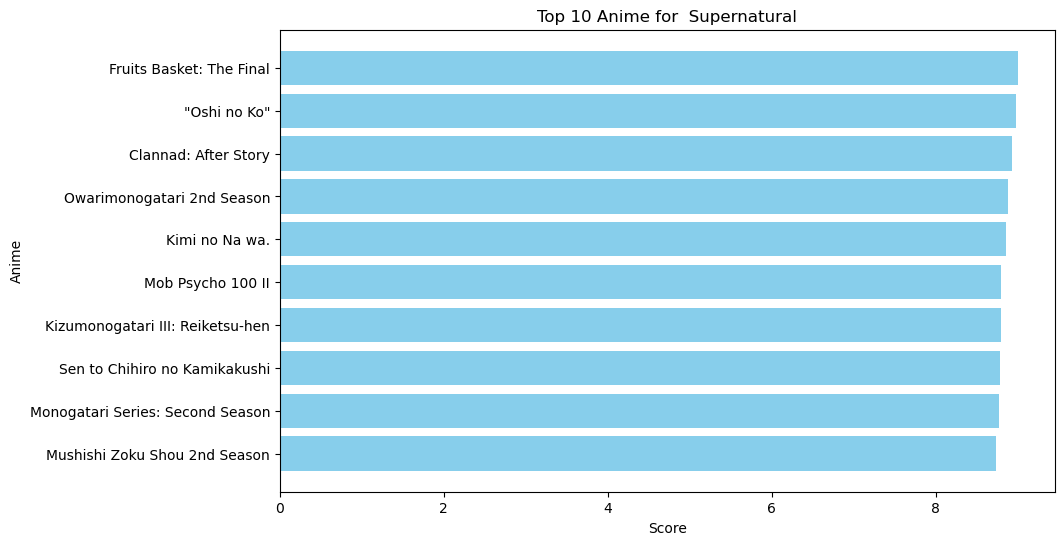

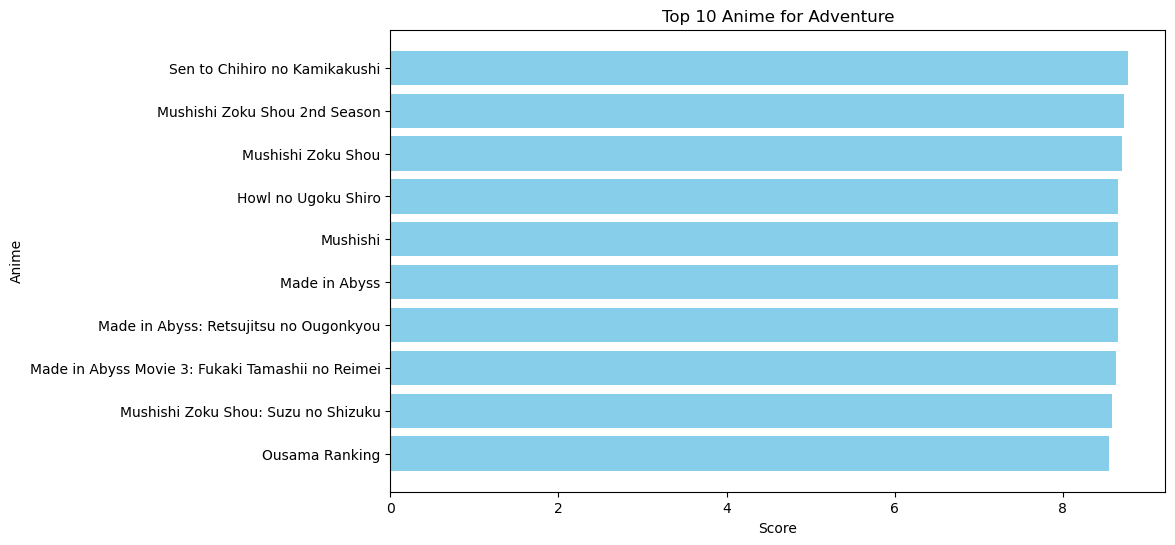

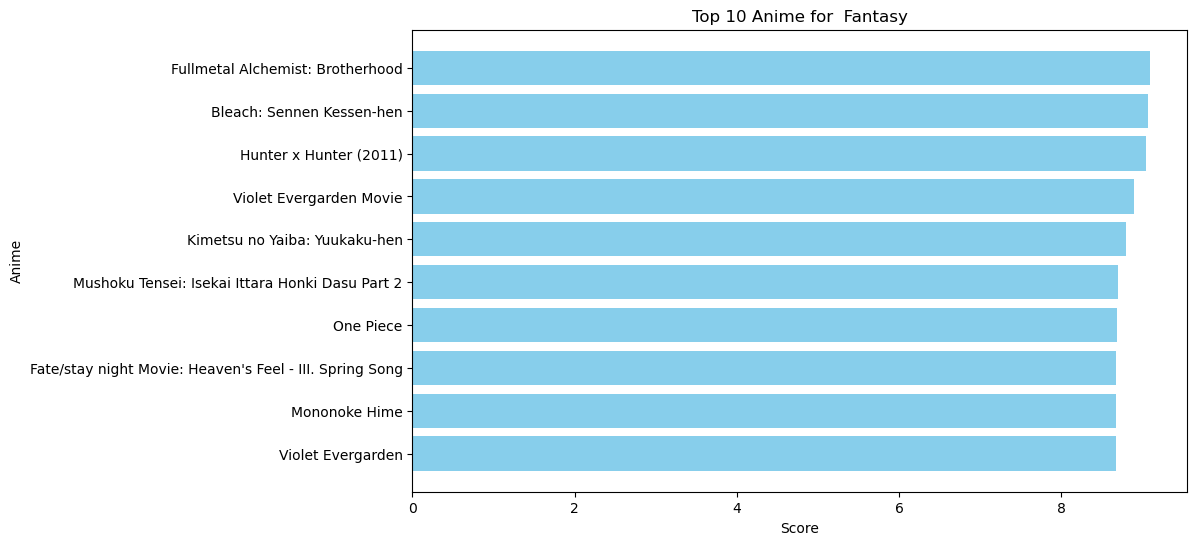

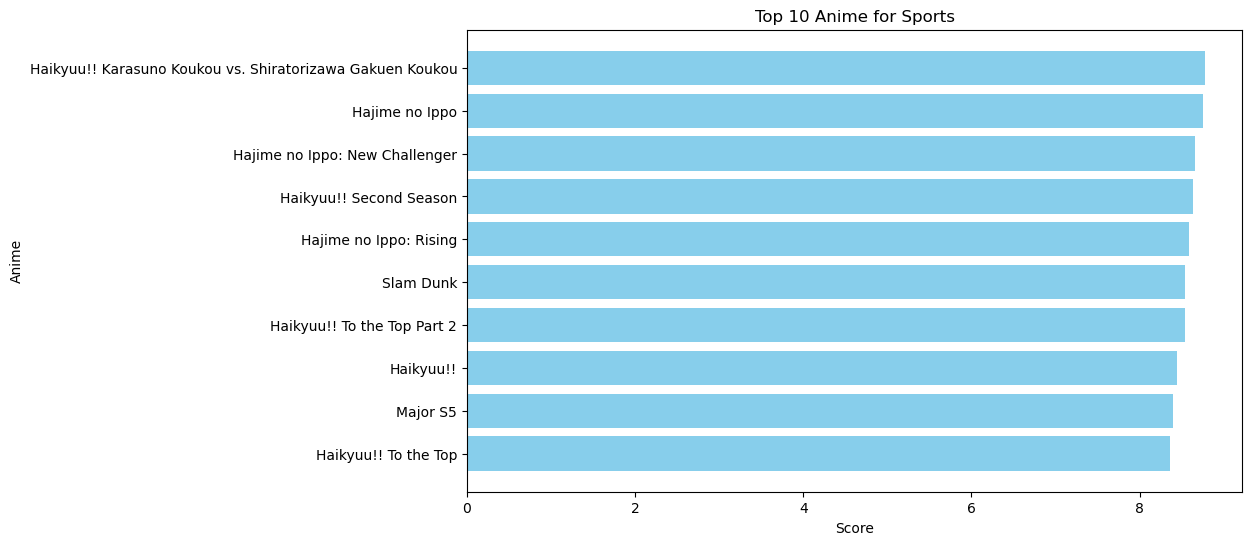

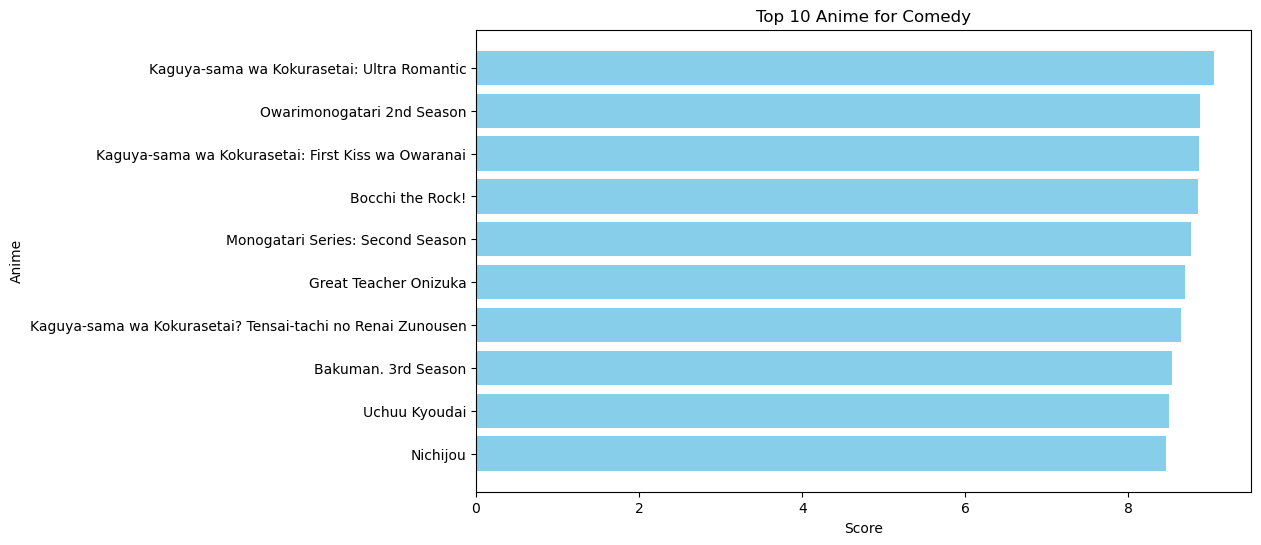

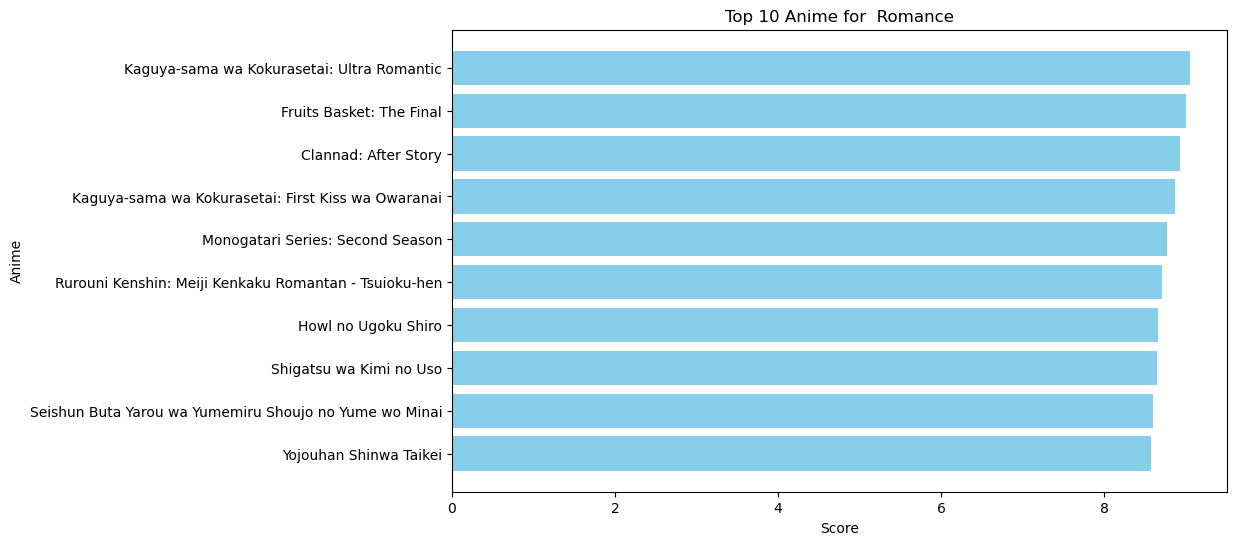

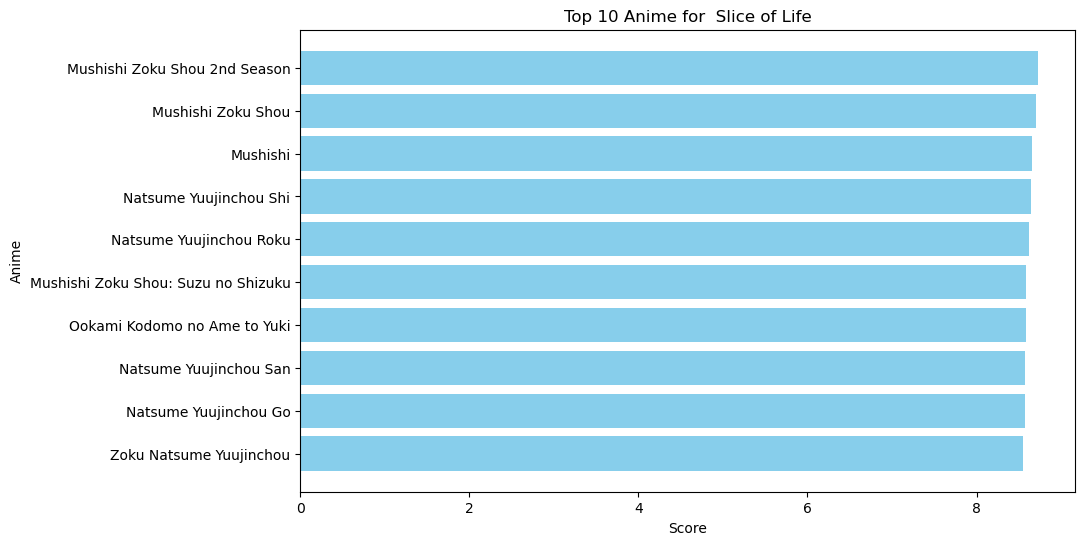

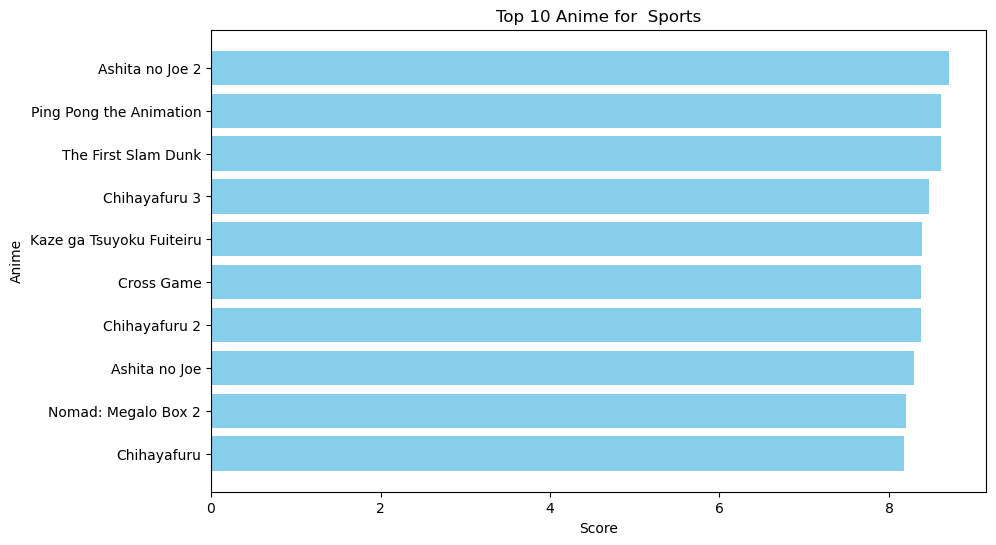

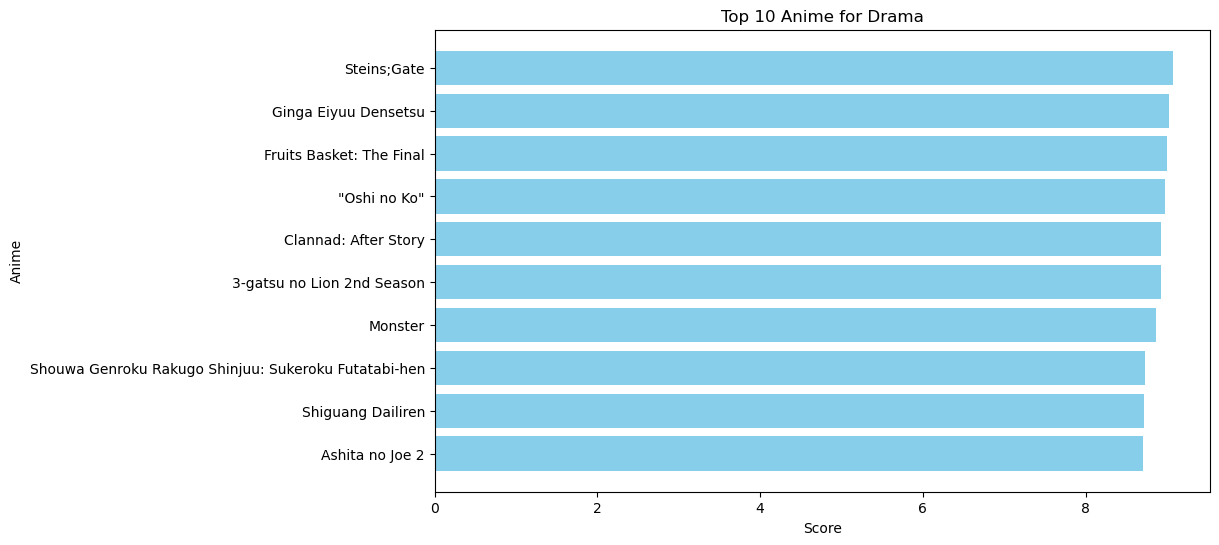

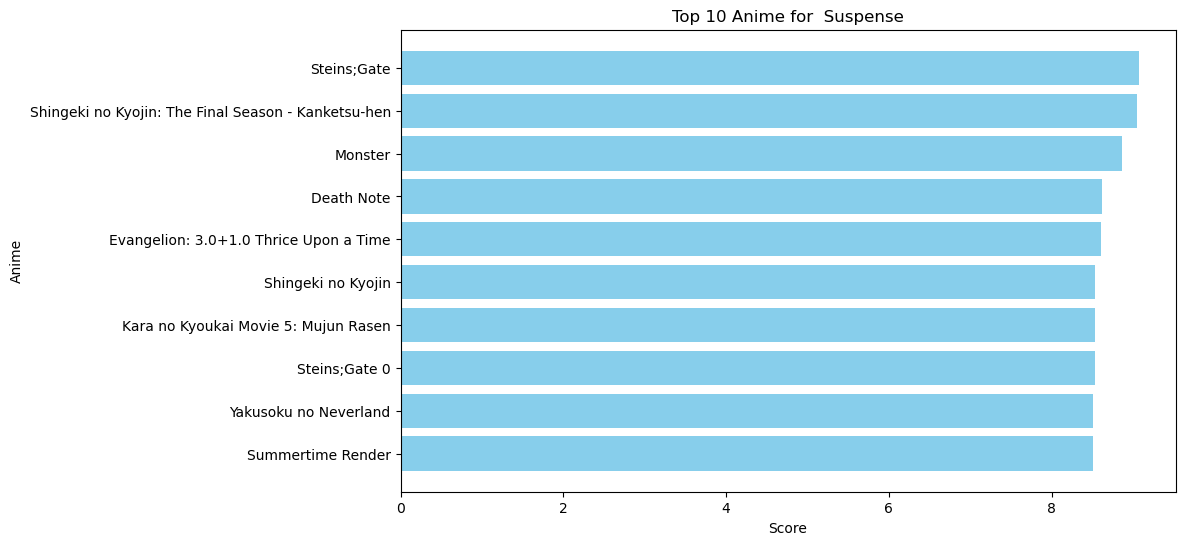

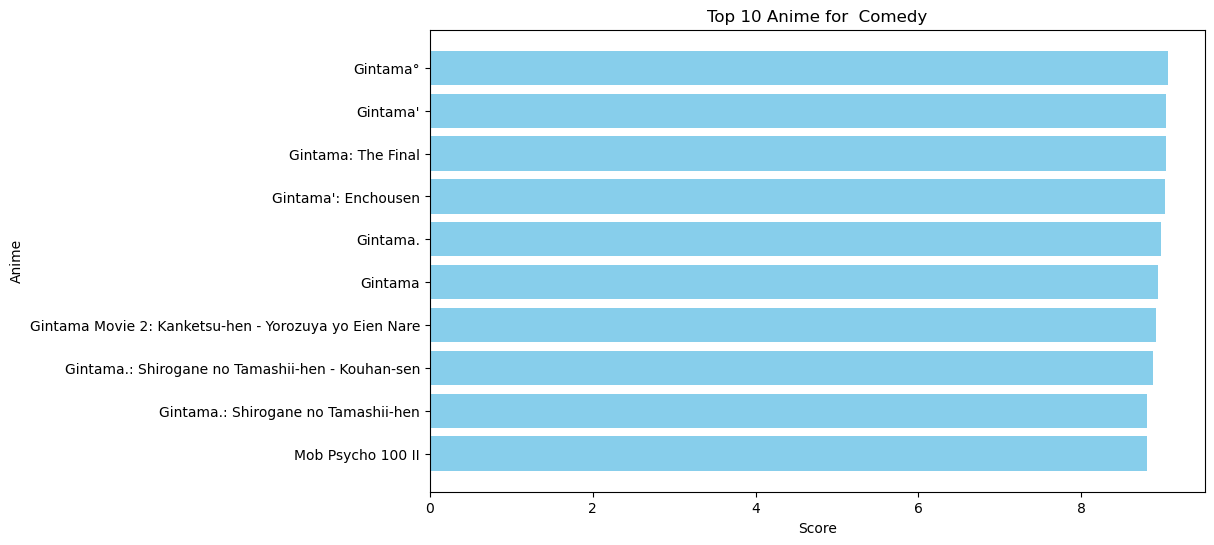

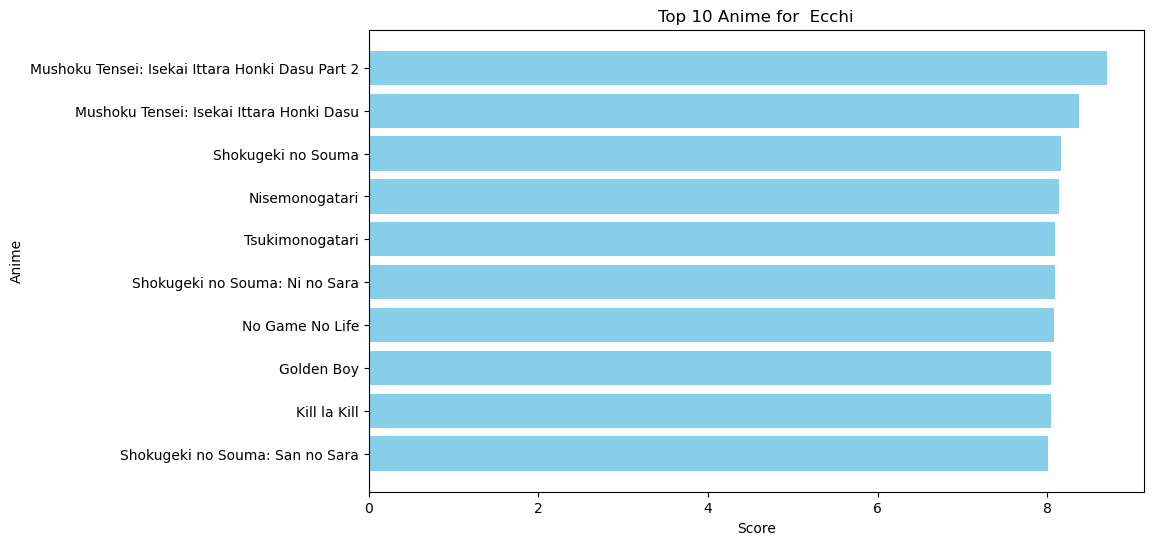

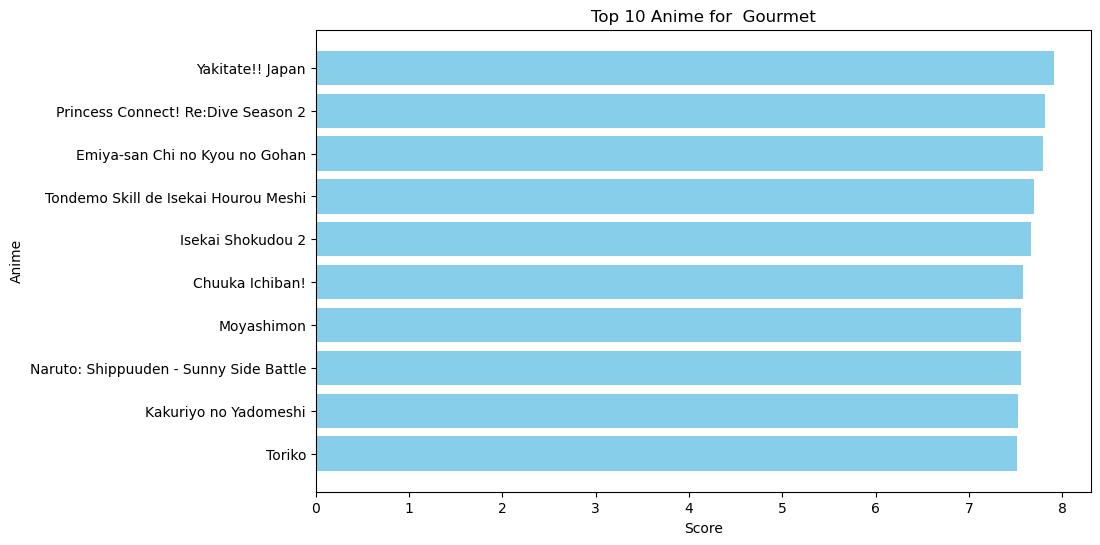

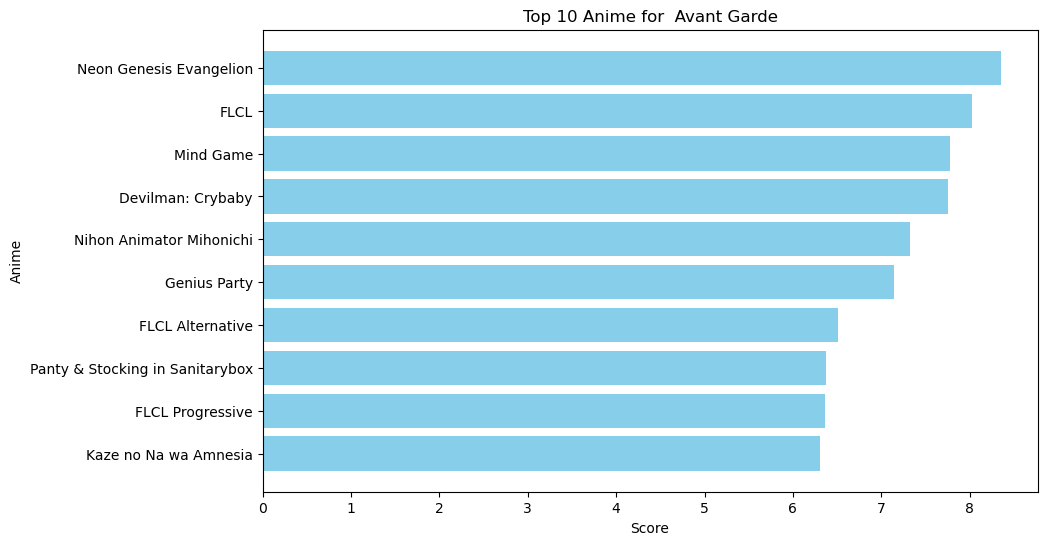

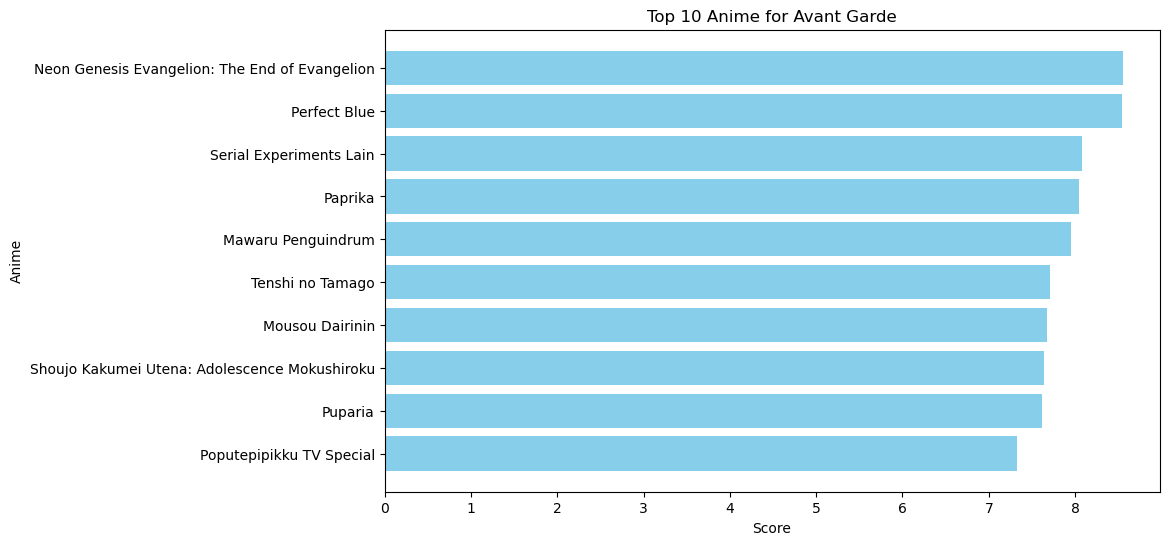

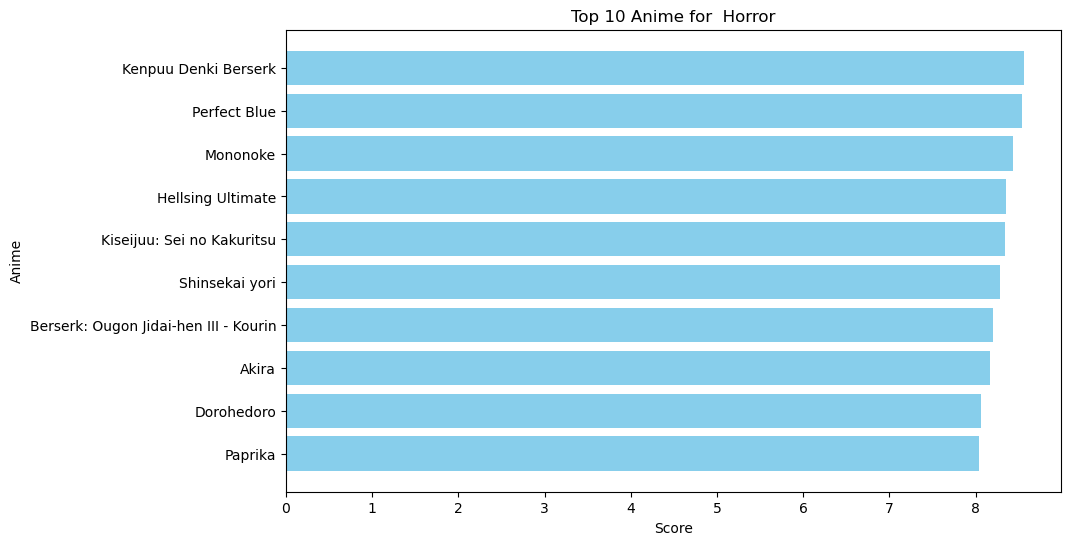

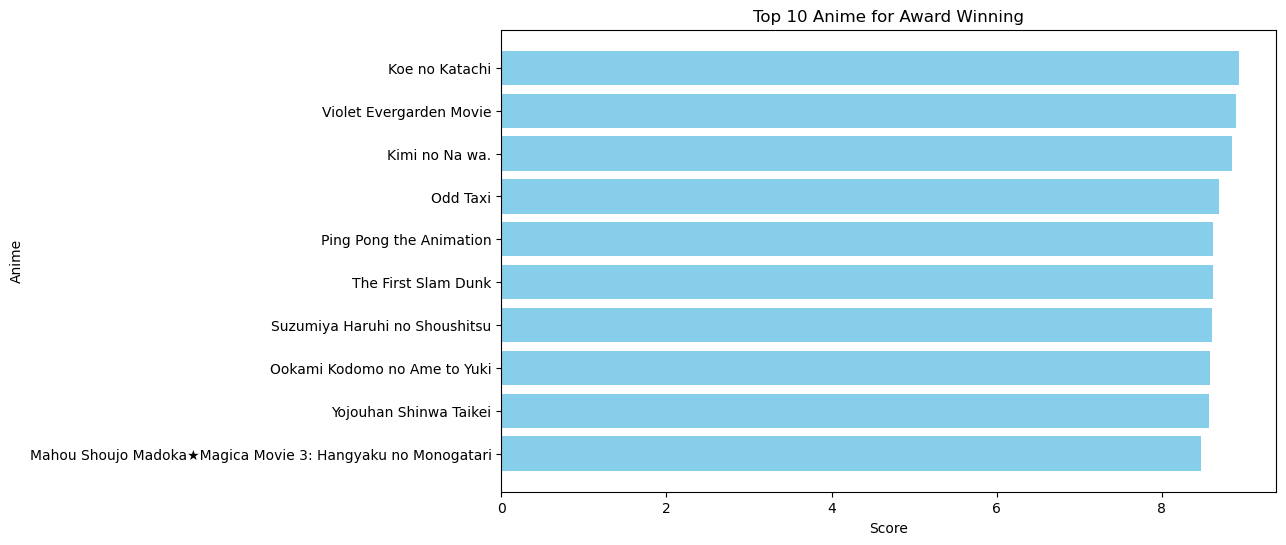

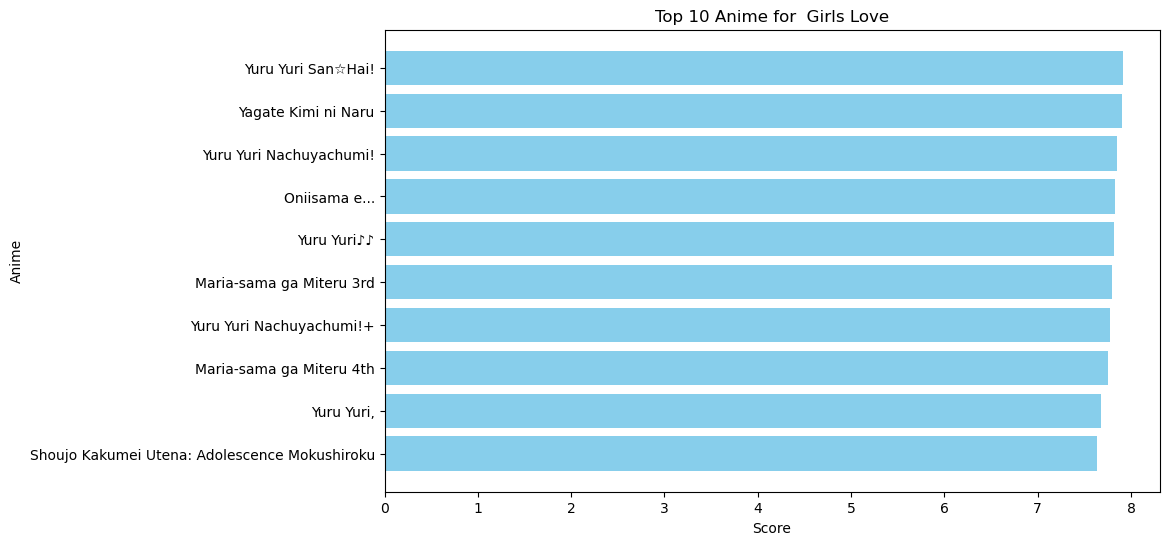

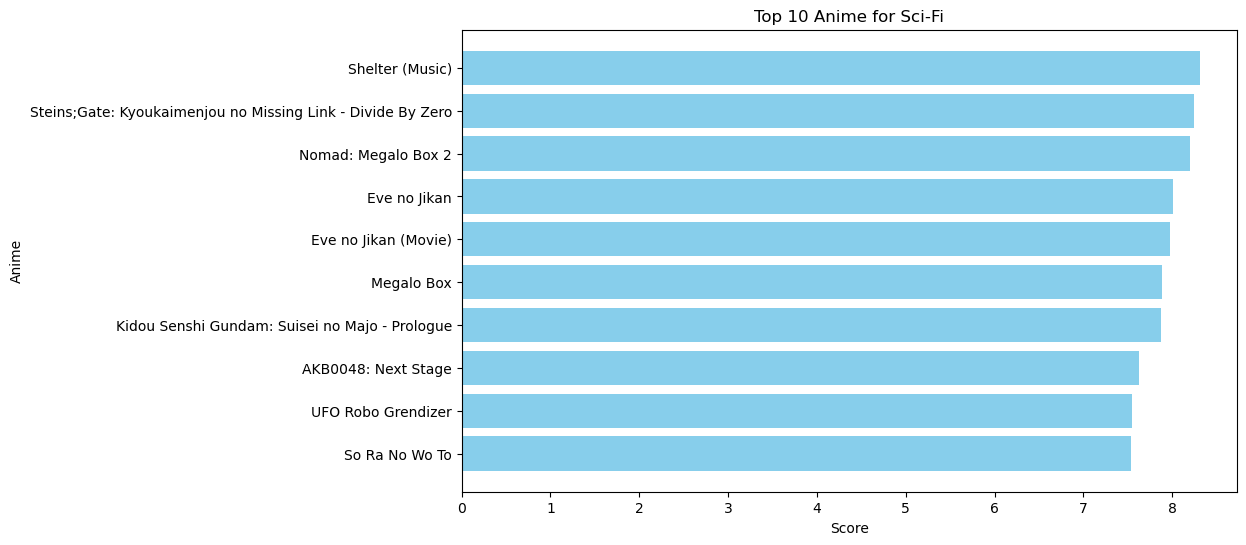

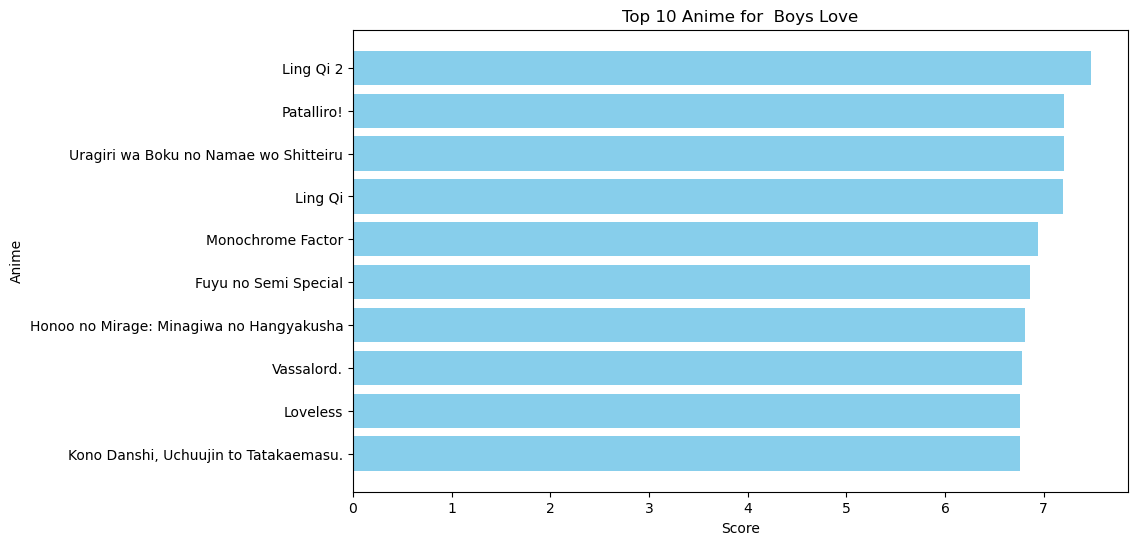

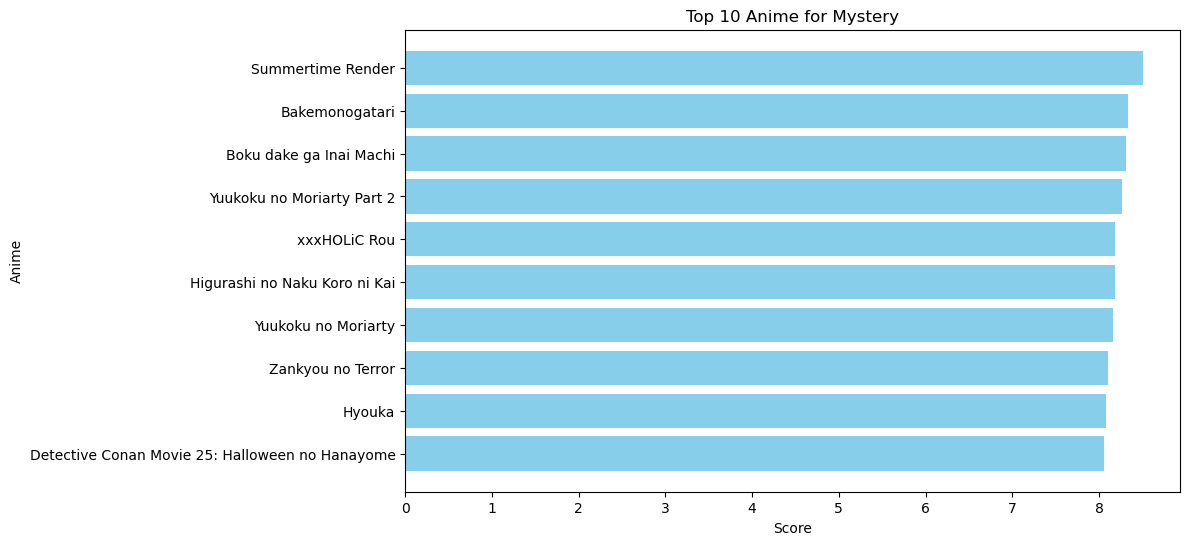

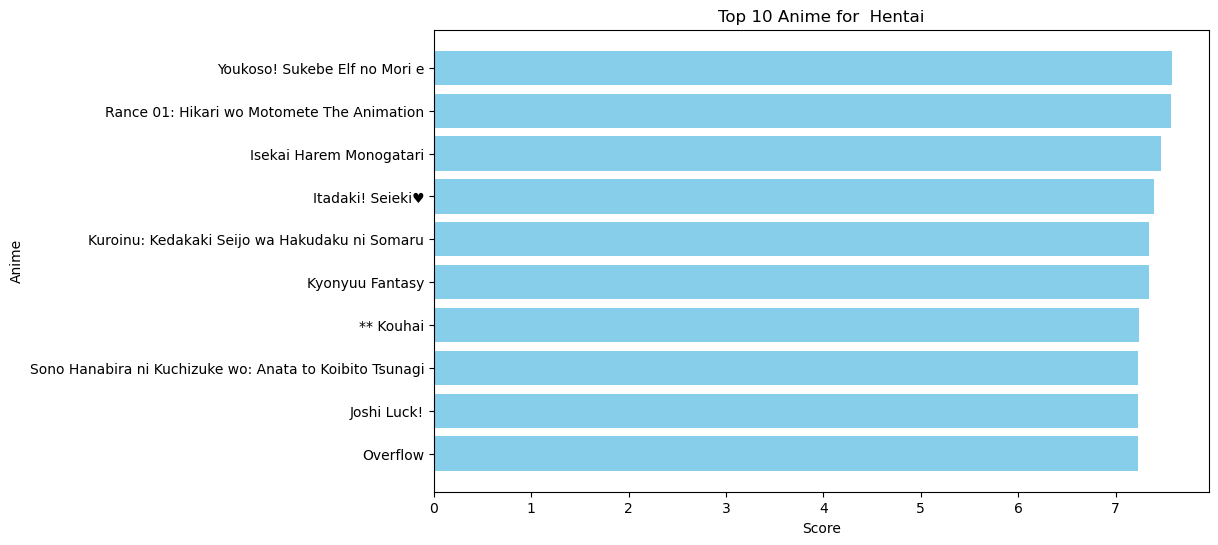

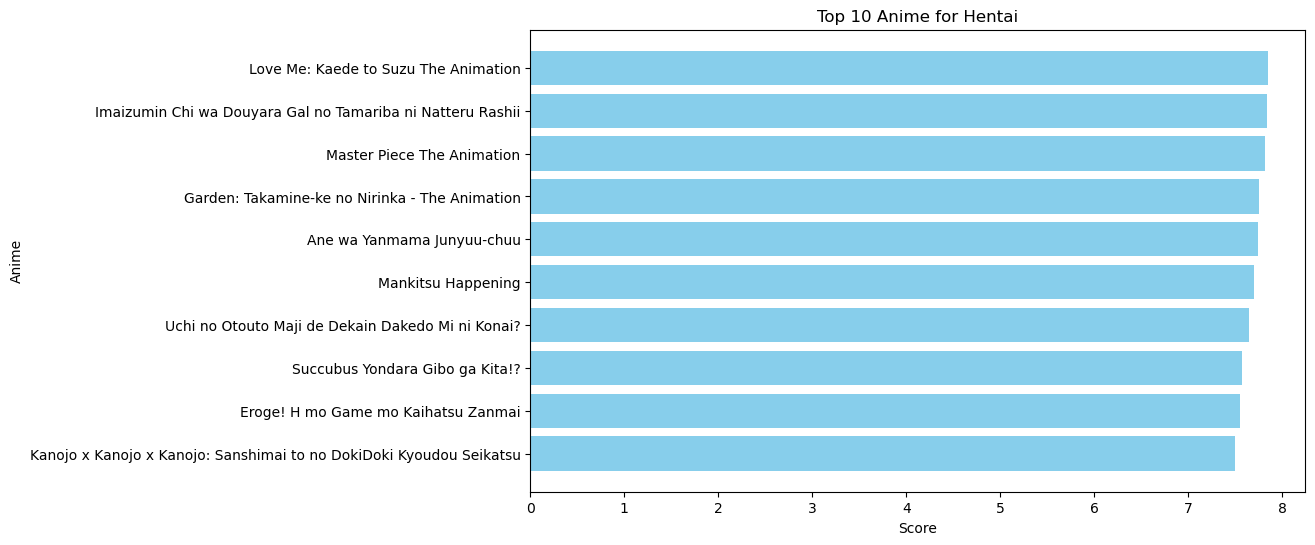

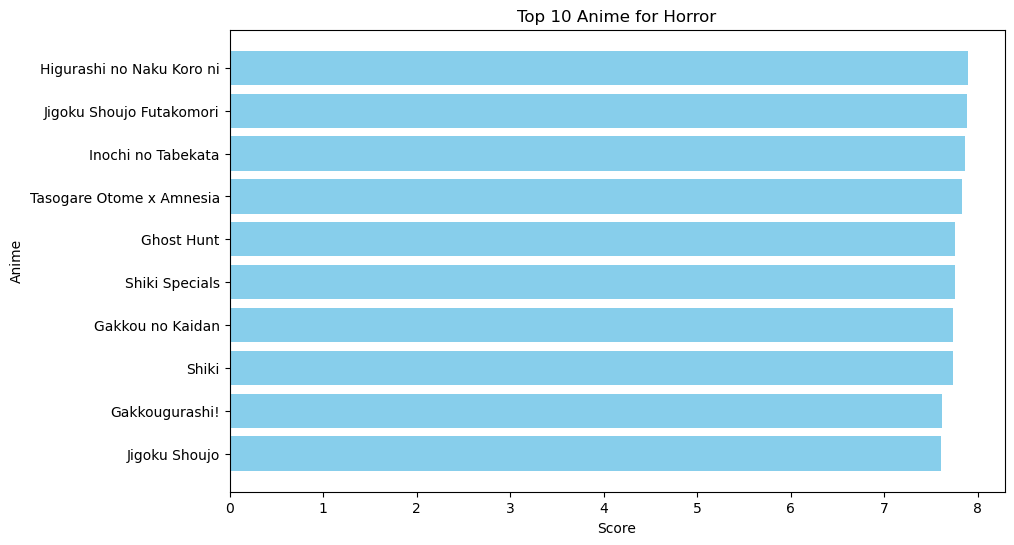

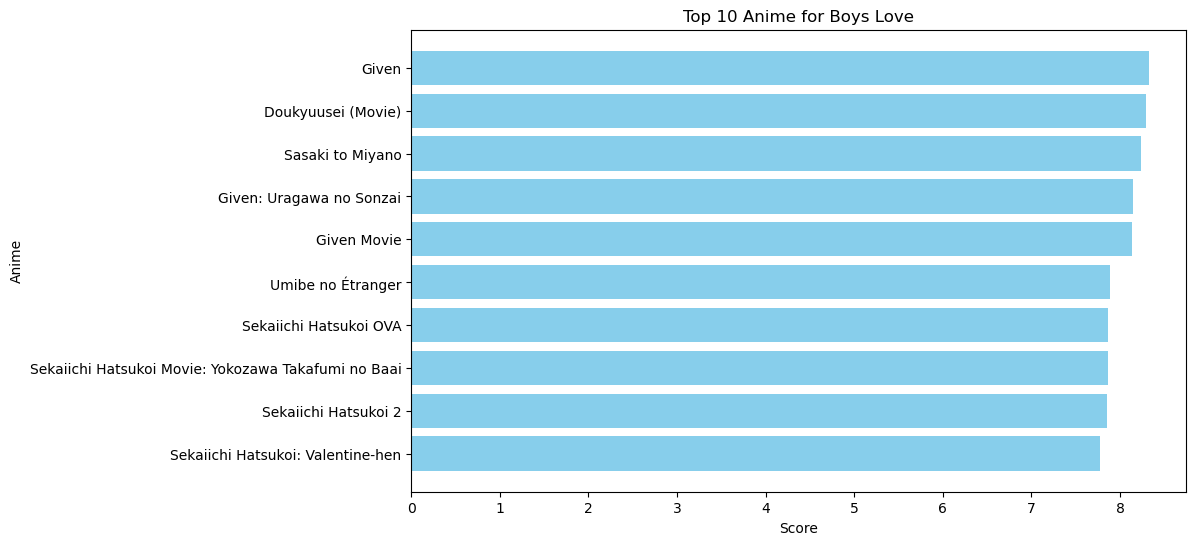

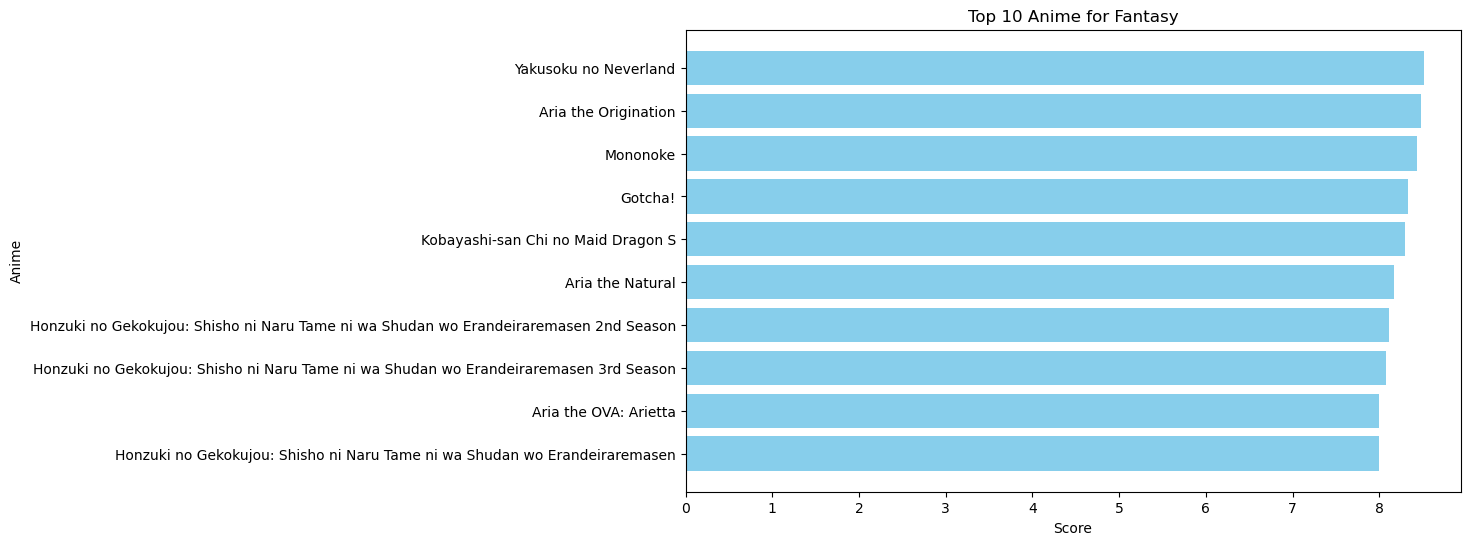

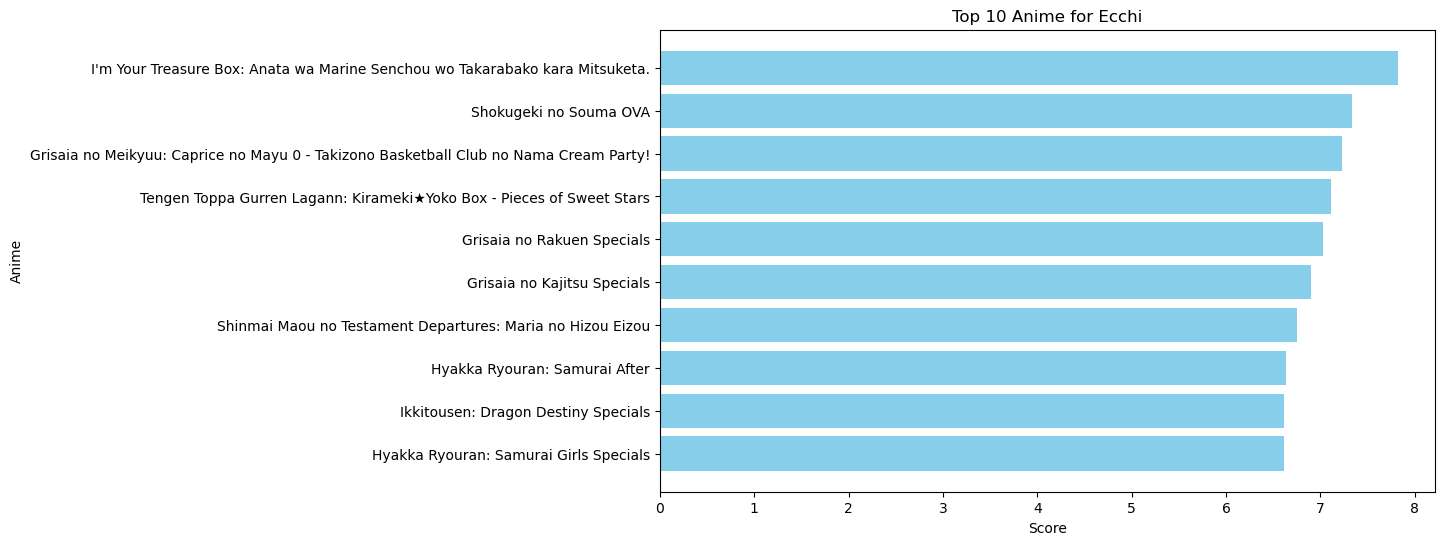

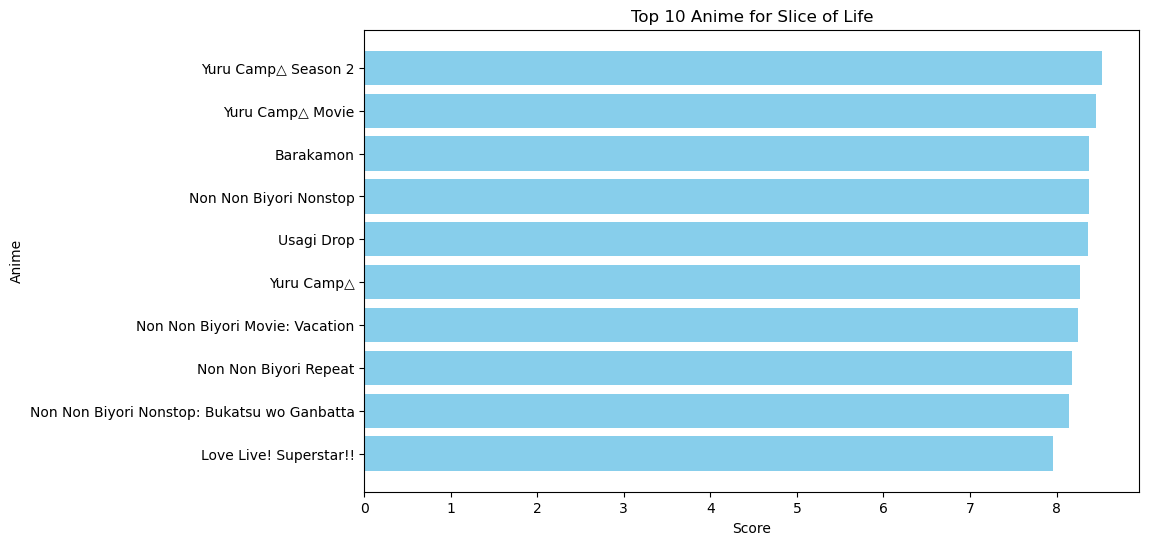

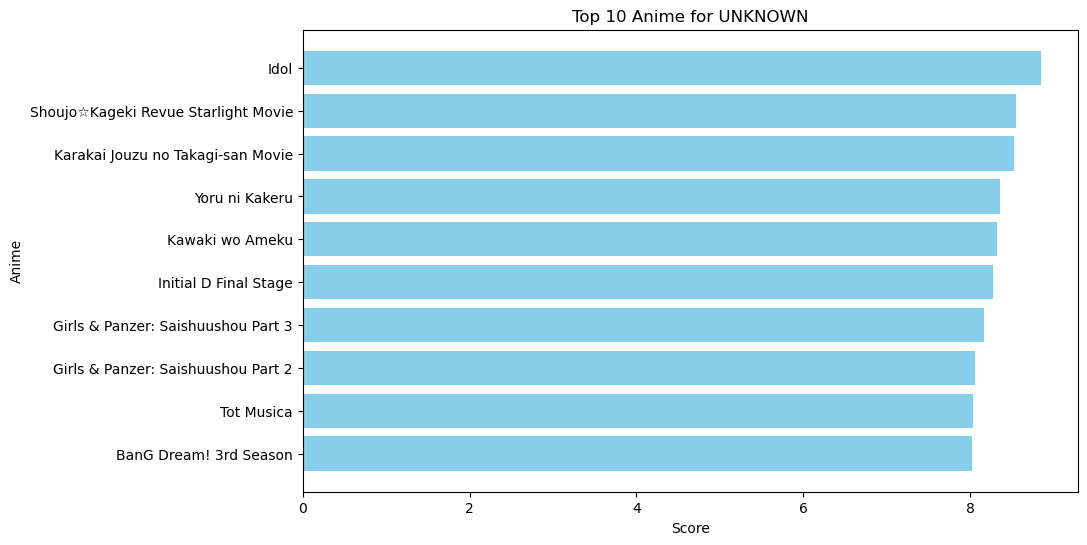

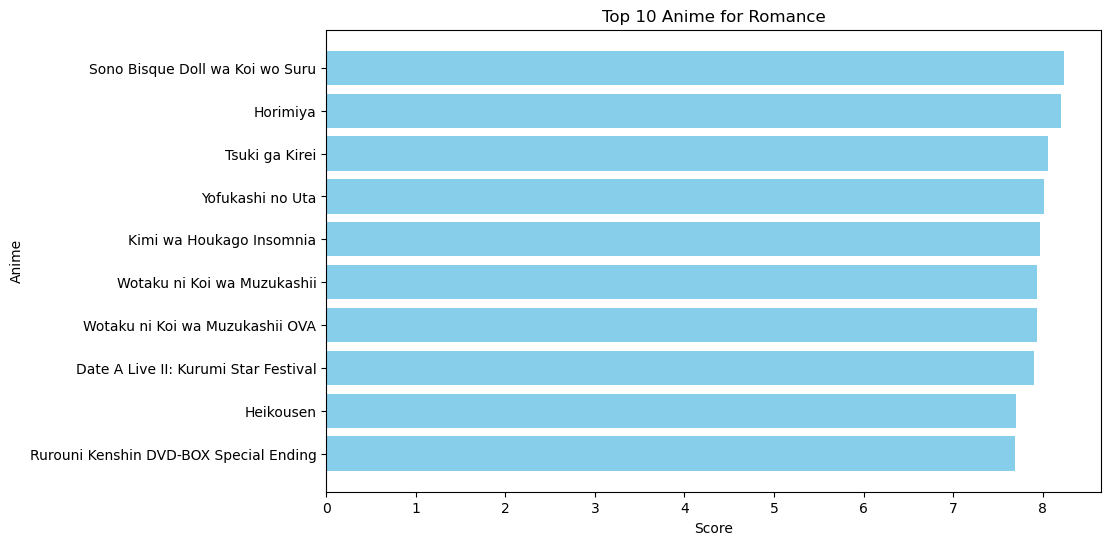

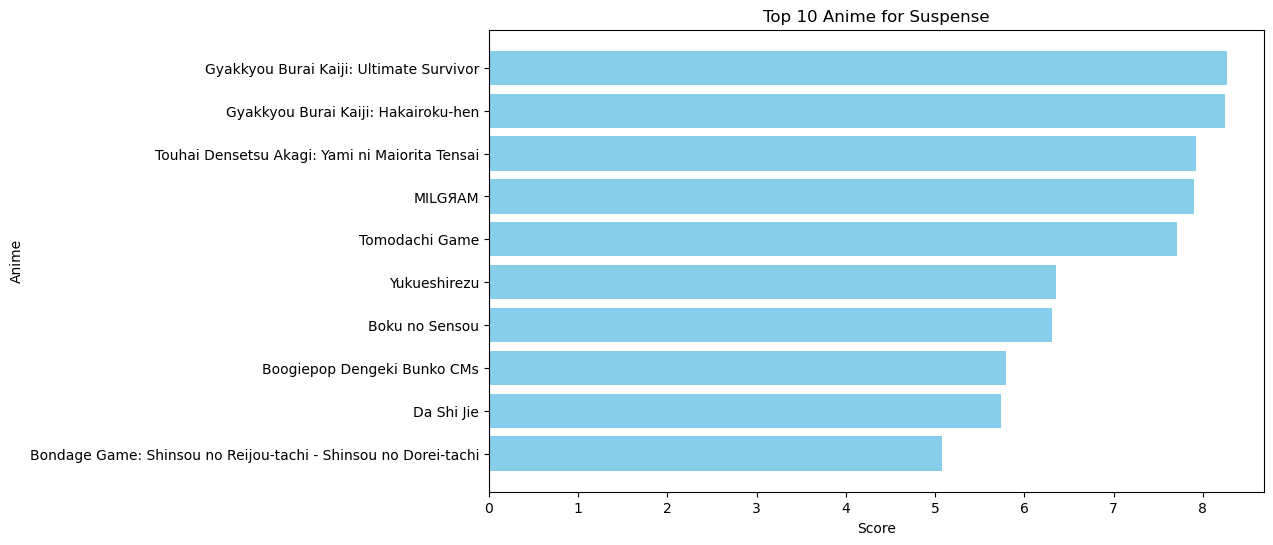

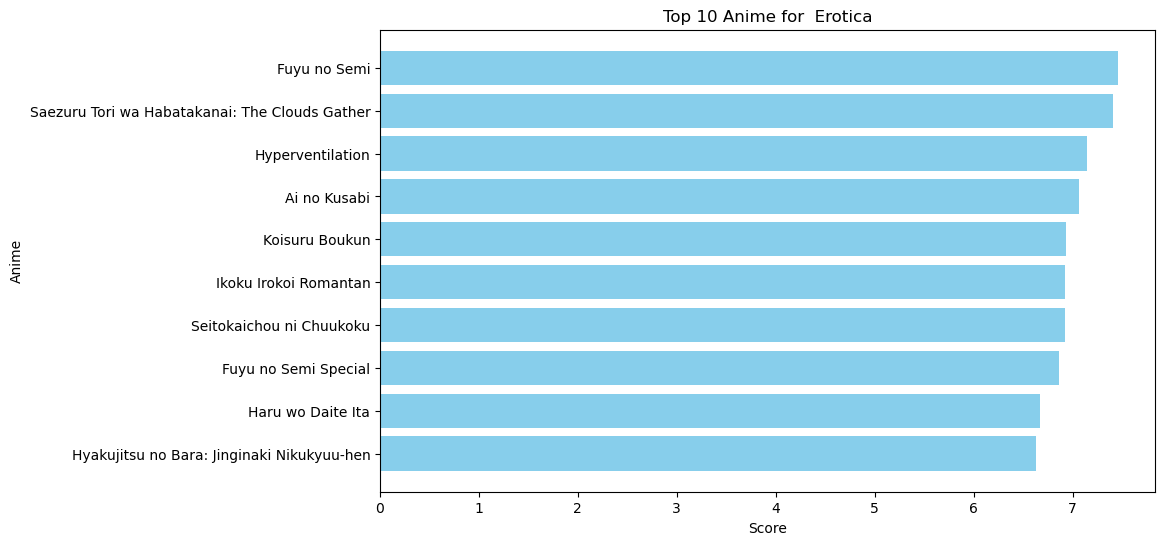

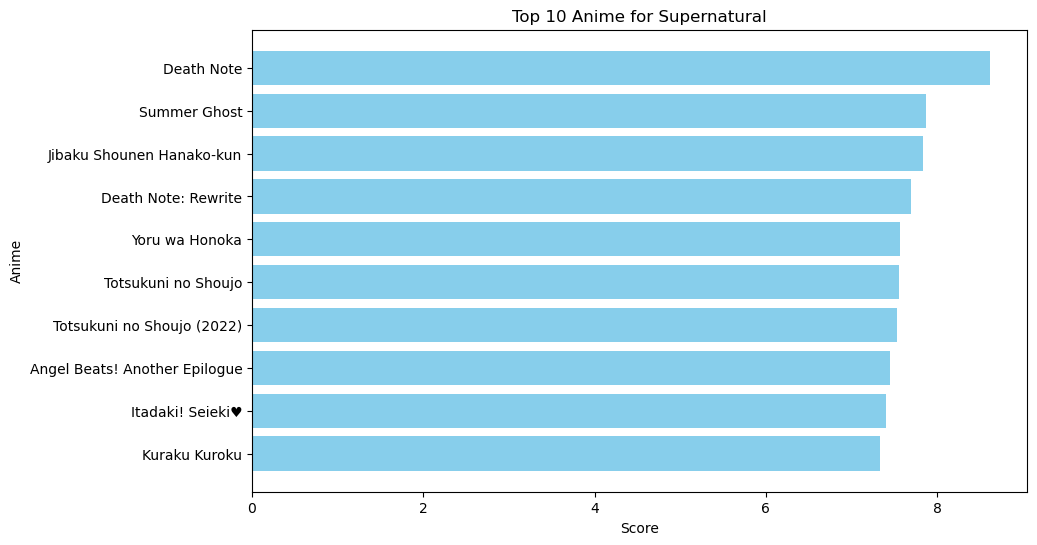

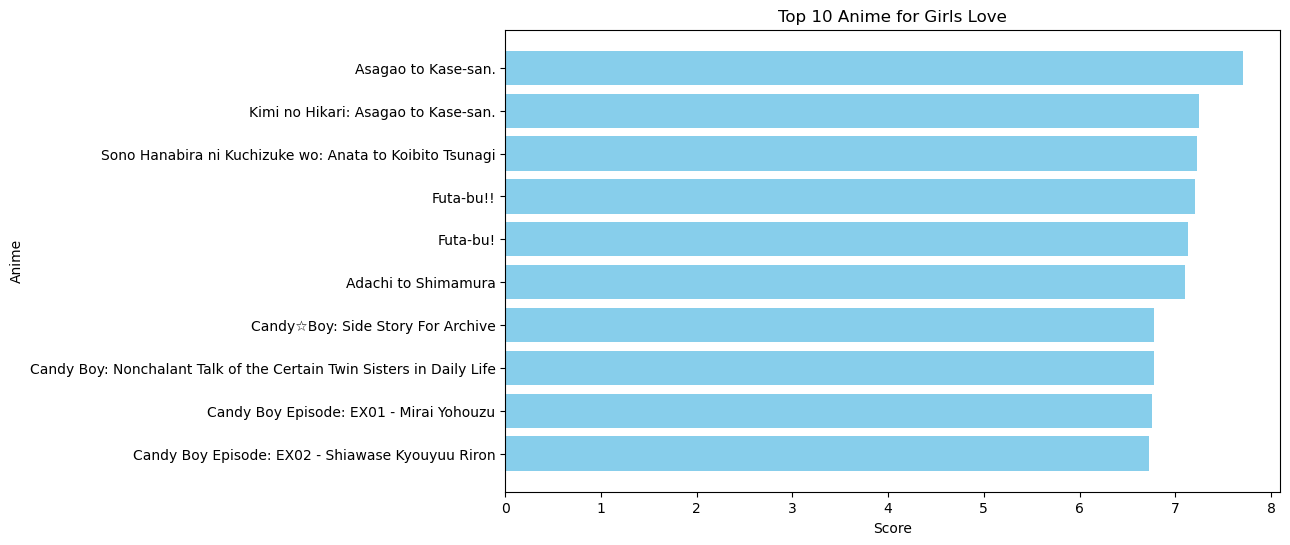

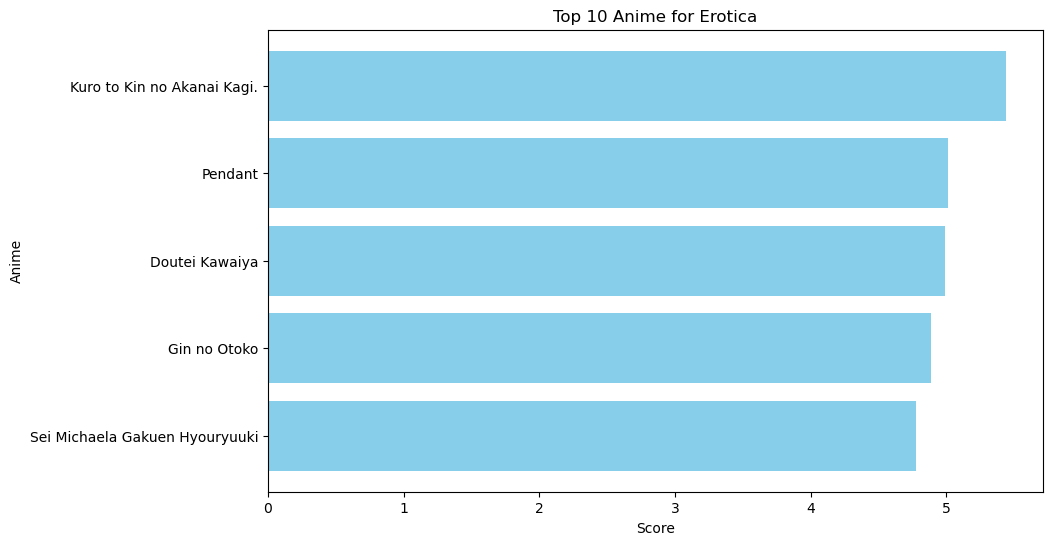

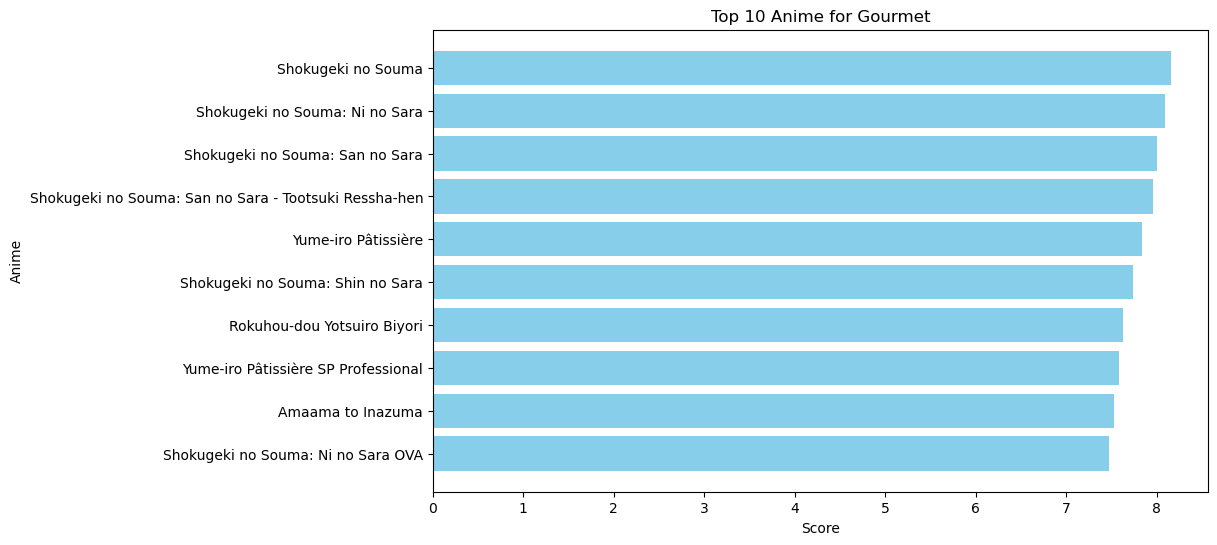

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Anime-dataset-2023.csv'
data = pd.read_csv(file_path)
data.dropna(subset=['Rank'], inplace=True)

data['Score'].replace('UNKNOWN', pd.NA, inplace=True)

data['Genres'] = data['Genres'].str.split(',')
data['Score'] = pd.to_numeric(data['Score'], errors='coerce')

data.dropna(subset=['Score'], inplace=True)

top_10_anime_by_genre = {}
for index, row in data.iterrows():
    genres = row['Genres']
    for genre in genres:
        if genre not in top_10_anime_by_genre:
            top_10_anime_by_genre[genre] = []
        top_10_anime_by_genre[genre].append((row['Name'], row['Score']))
for genre, anime_list in top_10_anime_by_genre.items():
    top_10_anime_by_genre[genre] = sorted(anime_list, key=lambda x: x[1], reverse=True)[:10]
for genre, anime_list in top_10_anime_by_genre.items():
    plt.figure(figsize=(10, 6))
    anime_names = [anime[0] for anime in anime_list]
    scores = [anime[1] for anime in anime_list]
    plt.barh(anime_names, scores, color='skyblue')
    plt.xlabel('Score')
    plt.ylabel('Anime')
    plt.title(f'Top 10 Anime for {genre}')
    plt.gca().invert_yaxis()  
    plt.show()
